In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML

data_path = ['..', 'data']

numeric = ["time", "pathLength", "issuesCount", "clicks", "deadClicks"]
scales = ["ease", "lostness"]
categorical = ["success", "issuesReported"]
info = ["variant", "respondent", "task", "taskText"]
strings = ["rawPath", "path", "note"]

# EDA - results

In [3]:
# load results
results = pd.read_csv(os.path.join(*data_path, 'results.csv'), index_col=0)
funnels = pd.read_csv(os.path.join(*data_path, 'funnels.csv'), index_col=0)
interactions = pd.read_csv(os.path.join(*data_path, 'interactions.csv'), index_col=0)
clicks =  pd.read_csv(os.path.join(*data_path, 'clicks.csv'))

## Time, path length, issues, clicks and deadclicks

In [4]:
results[numeric[:3]].agg(['mean', 'median', 'std', 'min', 'max', 'sum']).transpose()

,mean,median,std,min,max,sum
time,77.570813,69.0,43.018157,23.0,400.0,18616.995
pathLength,12.579167,14.0,6.925937,2.0,45.0,3019.000
issuesCount,0.550000,0.0,0.718553,0.0,3.0,132.000


In [5]:
results[numeric[:3]].quantile([0.1, 0.25, 0.5, 0.75, 0.95])

,time,pathLength,issuesCount
0.10,40.90000,4.0,0.0
0.25,48.00000,6.0,0.0
0.50,69.00000,14.0,0.0
0.75,91.00000,18.0,1.0
0.95,150.08335,22.0,2.0


In [6]:
results[numeric[:3] + ["variant"]].groupby('variant').agg(['mean', 'median', 'std', 'min', 'max', 'sum'])

time                                           \
                      mean median        std   min    max       sum   
variant                                                               
interactive      77.697225   69.0  37.992019  24.0  218.0  9323.667   
non-interactive  77.444400   69.5  47.678601  23.0  400.0  9293.328   

                pathLength                                     issuesCount  \
                      mean median       std  min   max     sum        mean   
variant                                                                      
interactive      14.241667   15.0  7.658681  2.0  45.0  1709.0    0.566667   
non-interactive  10.916667   11.0  5.666625  2.0  20.0  1310.0    0.533333   

                                                  
                median       std  min  max   sum  
variant                                           
interactive        0.0  0.764038  0.0  3.0  68.0  
non-interactive    0.0  0.672801  0.0  3.0  64.0

In [7]:
results[numeric[:3] + ["variant"]].groupby('variant').quantile([0.1, 0.25, 0.5, 0.75, 0.95])

time  pathLength  issuesCount
variant                                                 
interactive     0.10   41.00000        6.00          0.0
                0.25   48.00000        7.00          0.0
                0.50   69.00000       15.00          0.0
                0.75   97.75000       19.00          1.0
                0.95  151.78365       25.05          2.0
non-interactive 0.10   38.90000        4.00          0.0
                0.25   48.75000        6.00          0.0
                0.50   69.50000       11.00          0.0
                0.75   89.00000       15.00          1.0
                0.95  136.45000       19.00          2.0

In [8]:
results[numeric[3:]].agg(['mean', 'median', 'std', 'min', 'max', 'sum']).transpose()

,mean,median,std,min,max,sum
clicks,29.241667,25.0,18.106147,5.0,141.0,7018.0
deadClicks,18.312500,16.0,15.142774,0.0,129.0,4395.0


In [9]:
results[numeric[3:]].quantile([0.1, 0.25, 0.5, 0.75, 0.95])

,clicks,deadClicks
0.10,11.0,5.00
0.25,16.0,9.00
0.50,25.0,16.00
0.75,39.0,22.25
0.95,59.1,41.05


In [10]:
results[numeric[3:] + ["variant"]].groupby('variant').agg(['mean', 'median', 'std', 'min', 'max', 'sum'])

clicks                                       deadClicks  \
                      mean median        std  min    max     sum       mean   
variant                                                                       
interactive      27.433333   24.5  15.737197  5.0   76.0  3292.0     14.700   
non-interactive  31.050000   25.5  20.103869  7.0  141.0  3726.0     21.925   

                                                       
                median        std  min    max     sum  
variant                                                
interactive       11.5  10.697208  2.0   59.0  1764.0  
non-interactive   18.0  17.882512  0.0  129.0  2631.0

In [11]:
results[numeric[3:] + ["variant"]].groupby('variant').quantile([0.1, 0.25, 0.5, 0.75, 0.95])

clicks  deadClicks
variant                                 
interactive     0.10   10.00        4.00
                0.25   13.00        6.00
                0.50   24.50       11.50
                0.75   39.25       21.25
                0.95   51.40       36.05
non-interactive 0.10   12.00        8.90
                0.25   18.75       12.00
                0.50   25.50       18.00
                0.75   38.25       24.25
                0.95   64.05       47.00

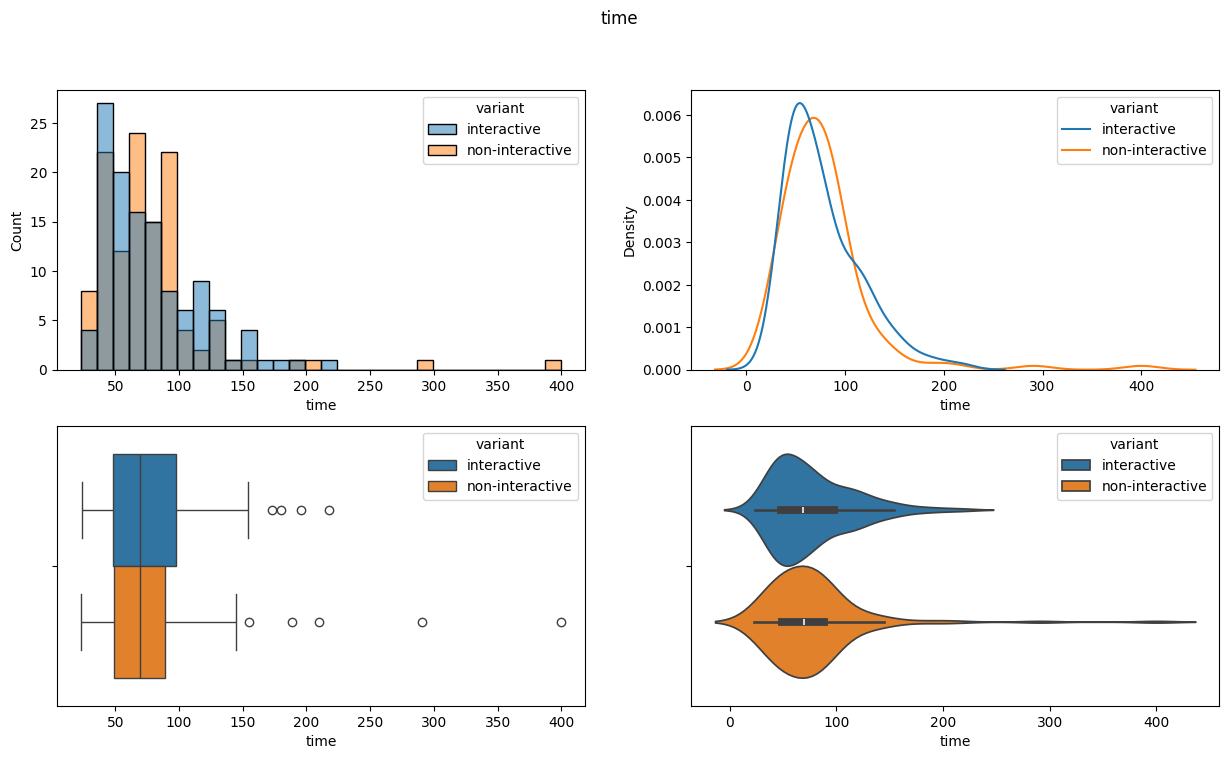

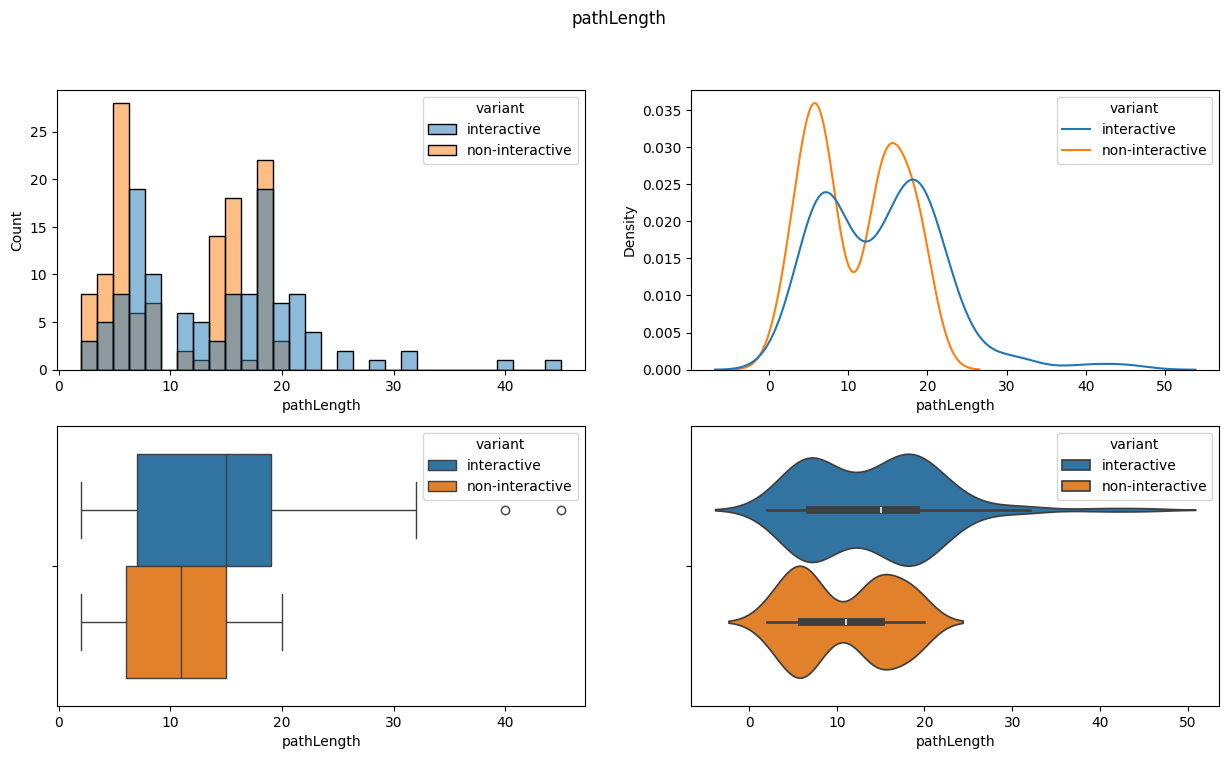

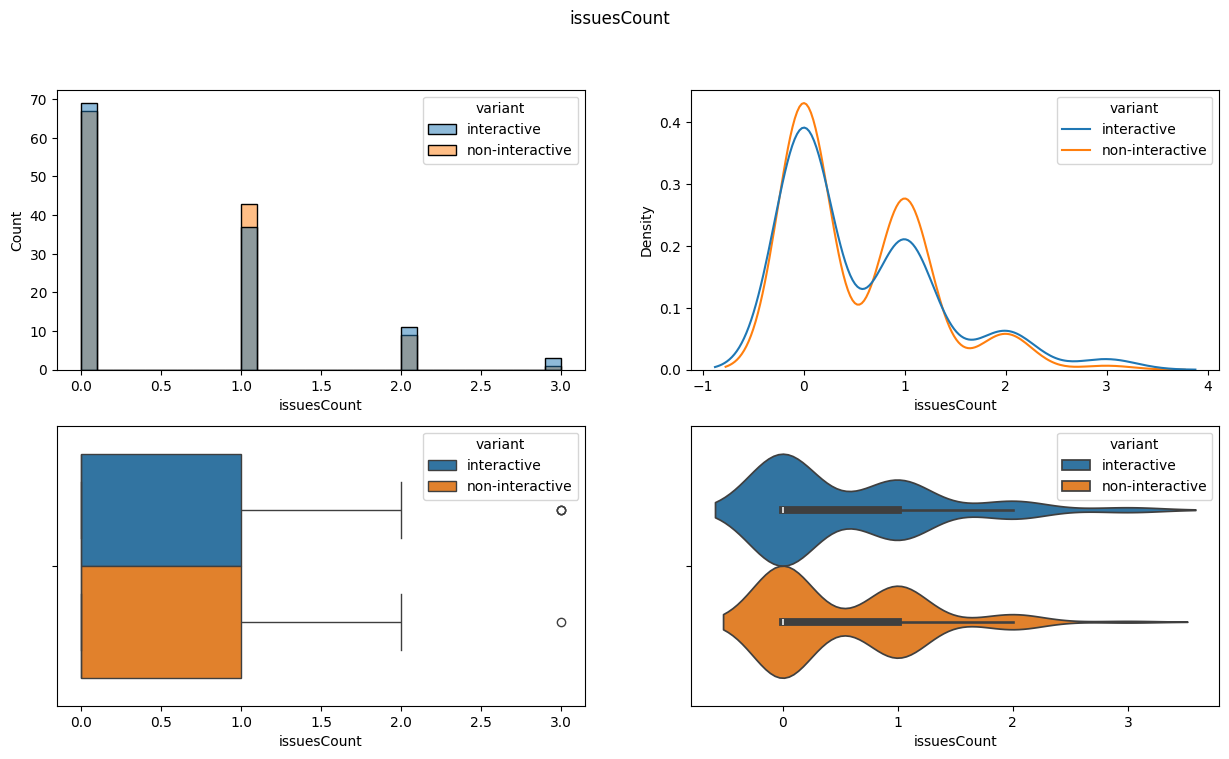

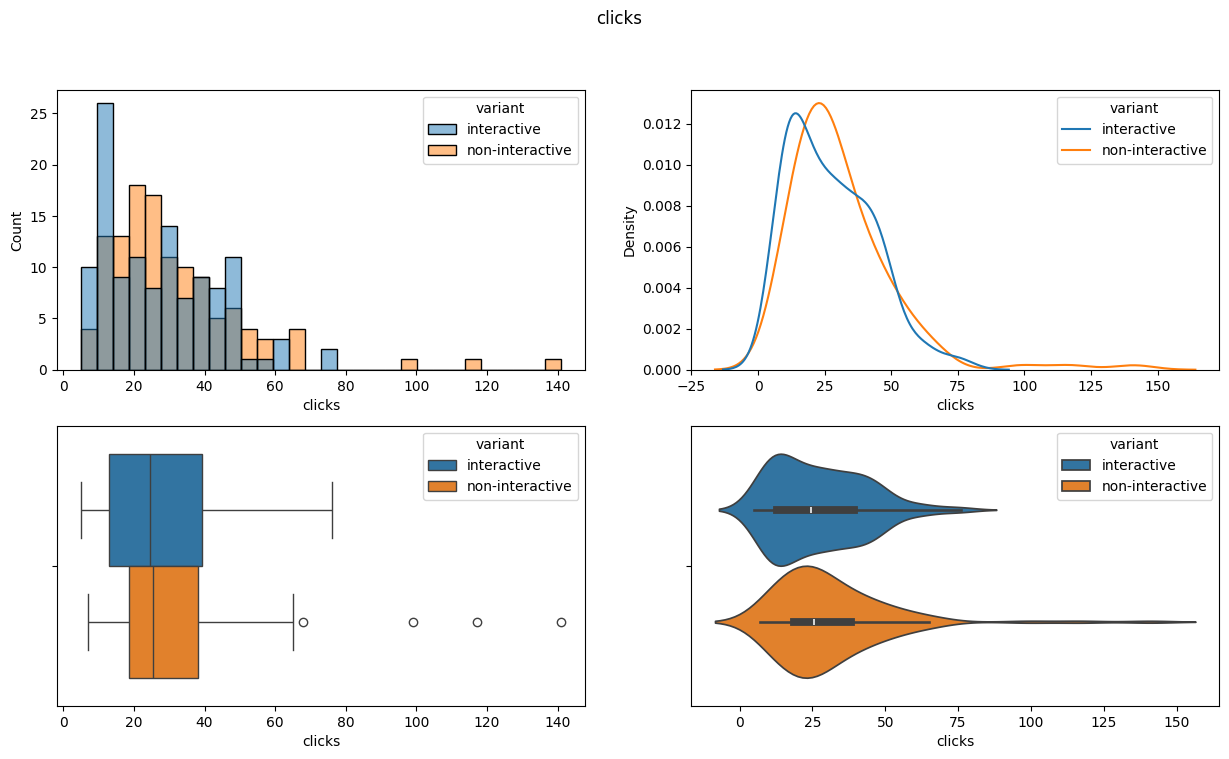

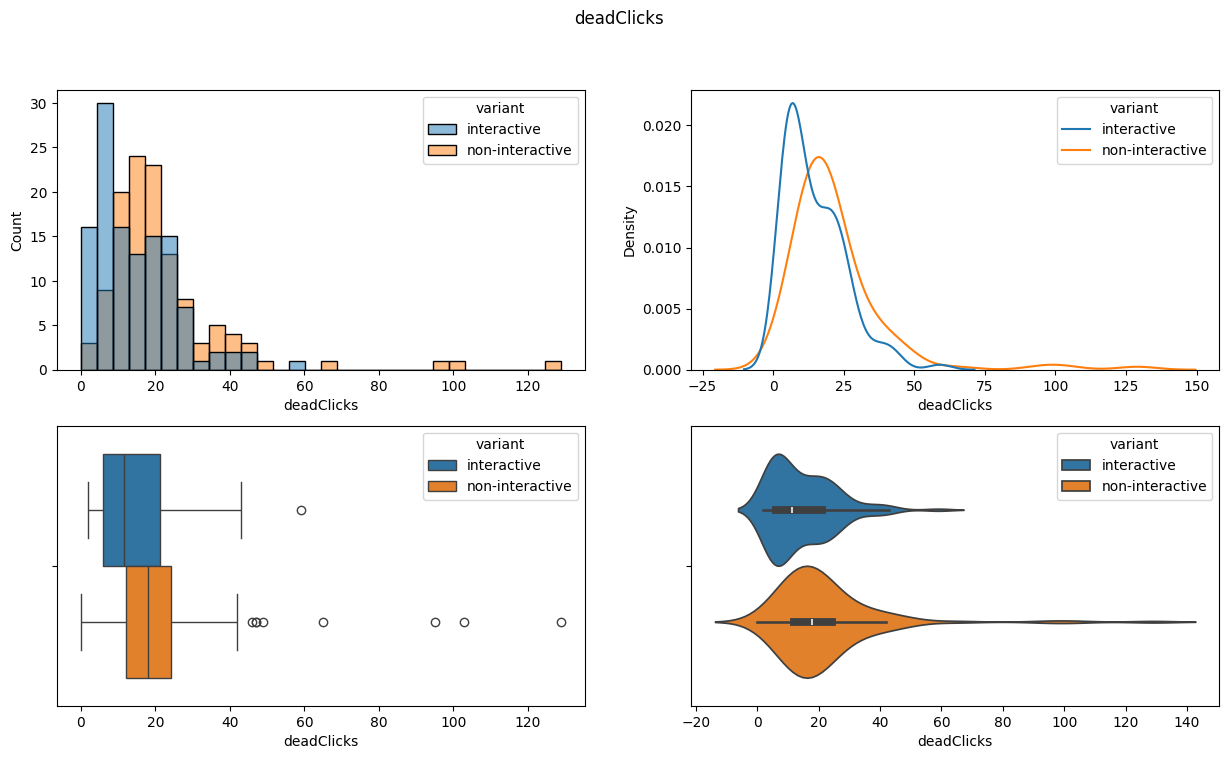

In [12]:
for column in numeric:
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))
    sns.histplot(data=results, x=column, bins=30, hue='variant', ax=ax1)
    sns.kdeplot(data=results, x=column, hue='variant',  ax=ax2)
    sns.boxplot(data=results, x=column, hue='variant', ax=ax3)
    sns.violinplot(data=results, x=column, hue='variant', ax=ax4)
    fig.suptitle(column)

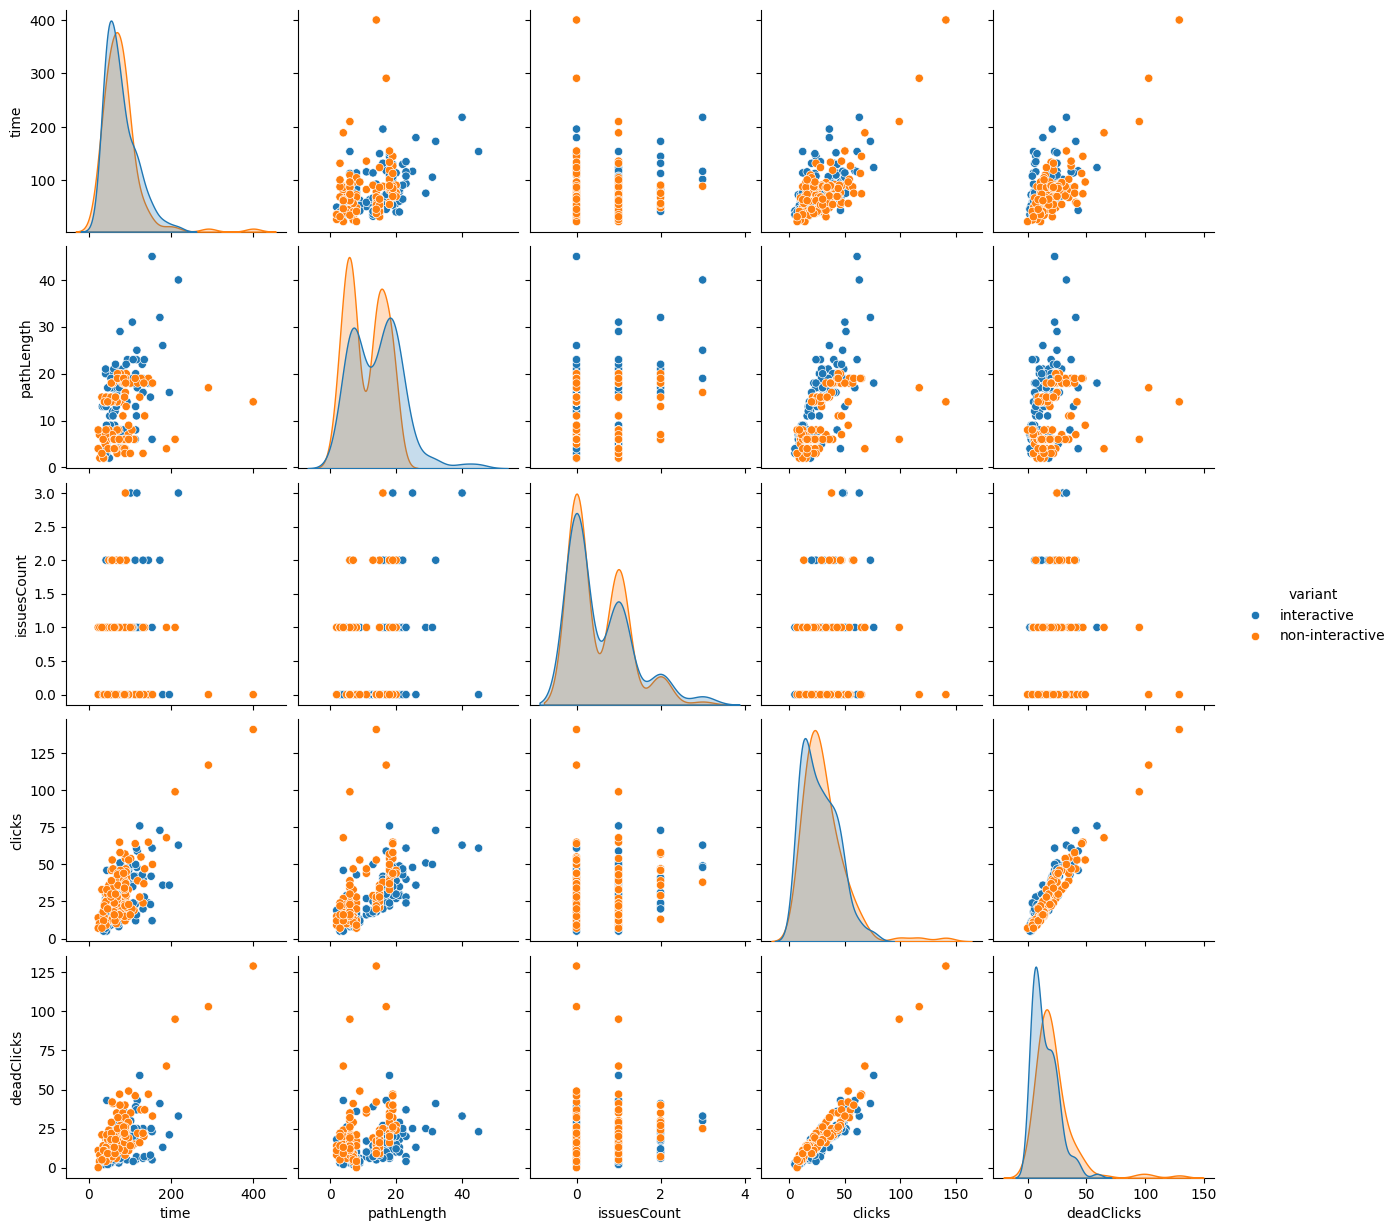

In [13]:
sns.pairplot(data=results[numeric + ["variant"]], hue="variant")

### Per task

In [14]:
results[numeric[:3] + ["variant", "task"]].groupby(['variant', 'task']).agg(['mean', 'median', 'std', 'min', 'max', 'sum'])

time                                           \
                           mean median        std   min    max       sum   
variant         task                                                       
interactive     1     75.200000   59.5  39.839550  32.0  196.0  3008.000   
                2     89.666675   85.5  39.018528  24.0  218.0  3586.667   
                3     68.225000   58.5  32.391426  33.0  180.0  2729.000   
non-interactive 1     86.958200   79.0  59.397983  32.0  400.0  3478.328   
                2     81.200000   76.5  37.118798  23.0  189.0  3248.000   
                3     64.175000   55.5  41.743347  27.0  291.0  2567.000   

                     pathLength                                     \
                           mean median       std  min   max    sum   
variant         task                                                 
interactive     1         9.325    7.0  4.445611  6.0  23.0  373.0   
                2        16.675   18.5  7.836102  3.0  40.0  667.0   
                3        16.725   17.0  7.785547  2.0  45.0  669.0   
non-interactive 1         5.950    6.0  1.796721  3.0  14.0  238.0   
                2        14.000   18.0  6.147753  2.0  20.0  560.0   
                3        12.800   14.0  4.273952  2.0  17.0  512.0   

                     issuesCount                                   
                            mean median       std  min  max   sum  
variant         task                                               
interactive     1          0.425    0.0  0.635993  0.0  2.0  17.0  
                2          0.825    1.0  0.930605  0.0  3.0  33.0  
                3          0.450    0.0  0.638508  0.0  2.0  18.0  
non-interactive 1          0.500    0.0  0.554700  0.0  2.0  20.0  
                2          0.750    1.0  0.707107  0.0  2.0  30.0  
                3          0.350    0.0  0.699817  0.0  3.0  14.0

In [15]:
results[numeric[:3] + ["variant", "task"]].groupby(['variant', 'task']).quantile([0.1, 0.25, 0.5, 0.75, 0.95])

time  pathLength  issuesCount
variant         task                                         
interactive     1    0.10   42.70000        6.00         0.00
                     0.25   47.75000        7.00         0.00
                     0.50   59.50000        7.00         0.00
                     0.75   96.75000        9.50         1.00
                     0.95  150.20000       18.25         2.00
                2    0.10   44.00000        4.00         0.00
                     0.25   68.00000       10.25         0.00
                     0.50   85.50000       18.50         1.00
                     0.75  114.50000       20.25         1.00
                     0.95  152.73365       25.35         3.00
                3    0.10   40.70000        5.00         0.00
                     0.25   42.75000       13.00         0.00
                     0.50   58.50000       17.00         0.00
                     0.75   76.50000       20.00         1.00
                     0.95  125.50000       29.10         2.00
non-interactive 1    0.10   41.80000        4.00         0.00
                     0.25   65.00000        6.00         0.00
                     0.50   79.00000        6.00         0.00
                     0.75   93.00000        6.00         1.00
                     0.95  135.90000        8.05         1.00
                2    0.10   35.40000        4.00         0.00
                     0.25   58.50000        7.75         0.00
                     0.50   76.50000       18.00         1.00
                     0.75   91.25000       19.00         1.00
                     0.95  145.50000       20.00         2.00
                3    0.10   38.00000        3.90         0.00
                     0.25   43.75000       14.00         0.00
                     0.50   55.50000       14.00         0.00
                     0.75   69.00000       15.00         0.25
                     0.95   92.65000       15.05         2.00

In [16]:
results[numeric[3:] + ["variant", "task"]].groupby(['variant', 'task']).agg(['mean', 'median', 'std', 'min', 'max', 'sum'])

clicks                                       deadClicks  \
                        mean median        std  min    max     sum       mean   
variant         task                                                            
interactive     1     14.825   12.0   6.291580  8.0   36.0   593.0      6.475   
                2     38.000   42.0  15.705625  5.0   73.0  1520.0     22.275   
                3     29.475   29.5  13.696317  5.0   76.0  1179.0     15.350   
non-interactive 1     26.500   21.0  23.939025  7.0  141.0  1060.0     22.475   
                2     37.800   40.5  17.769464  7.0   68.0  1512.0     24.575   
                3     28.850   26.0  16.476168  9.0  117.0  1154.0     18.725   

                                                           
                     median        std  min    max    sum  
variant         task                                       
interactive     1       5.0   3.941804  3.0   21.0  259.0  
                2      22.5  10.357674  2.0   43.0  891.0  
                3      13.0   9.882774  2.0   59.0  614.0  
non-interactive 1      17.0  22.932440  4.0  129.0  899.0  
                2      23.0  14.143745  0.0   65.0  983.0  
                3      15.0  15.224790  8.0  103.0  749.0

In [17]:
results[numeric[:3] + ["variant", "task"]].groupby(['variant', 'task']).quantile([0.1, 0.25, 0.5, 0.75, 0.95])

time  pathLength  issuesCount
variant         task                                         
interactive     1    0.10   42.70000        6.00         0.00
                     0.25   47.75000        7.00         0.00
                     0.50   59.50000        7.00         0.00
                     0.75   96.75000        9.50         1.00
                     0.95  150.20000       18.25         2.00
                2    0.10   44.00000        4.00         0.00
                     0.25   68.00000       10.25         0.00
                     0.50   85.50000       18.50         1.00
                     0.75  114.50000       20.25         1.00
                     0.95  152.73365       25.35         3.00
                3    0.10   40.70000        5.00         0.00
                     0.25   42.75000       13.00         0.00
                     0.50   58.50000       17.00         0.00
                     0.75   76.50000       20.00         1.00
                     0.95  125.50000       29.10         2.00
non-interactive 1    0.10   41.80000        4.00         0.00
                     0.25   65.00000        6.00         0.00
                     0.50   79.00000        6.00         0.00
                     0.75   93.00000        6.00         1.00
                     0.95  135.90000        8.05         1.00
                2    0.10   35.40000        4.00         0.00
                     0.25   58.50000        7.75         0.00
                     0.50   76.50000       18.00         1.00
                     0.75   91.25000       19.00         1.00
                     0.95  145.50000       20.00         2.00
                3    0.10   38.00000        3.90         0.00
                     0.25   43.75000       14.00         0.00
                     0.50   55.50000       14.00         0.00
                     0.75   69.00000       15.00         0.25
                     0.95   92.65000       15.05         2.00

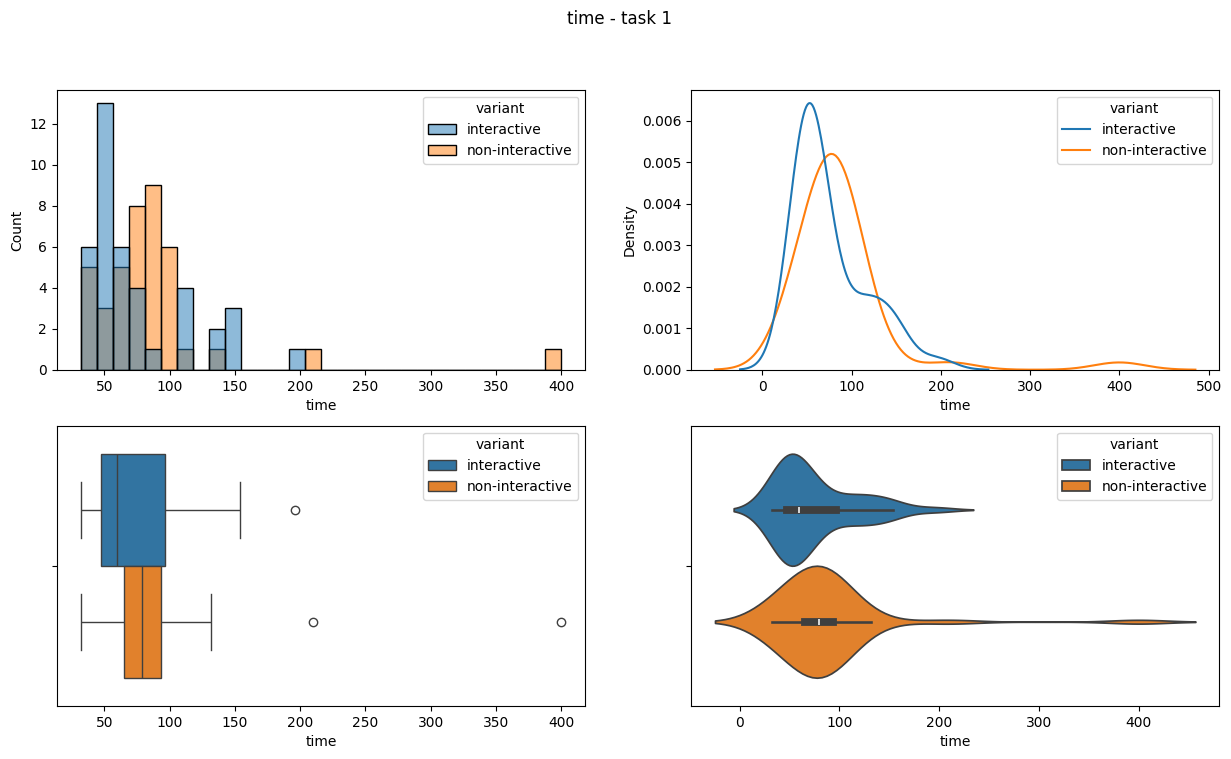

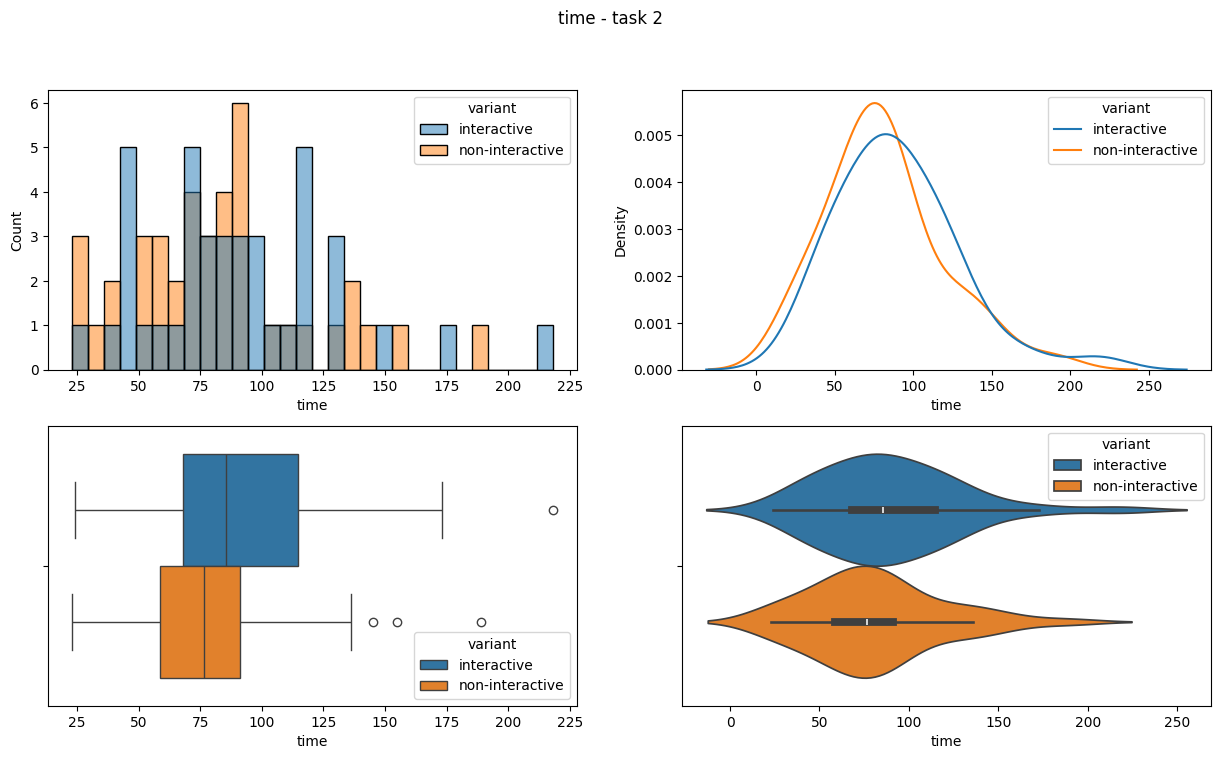

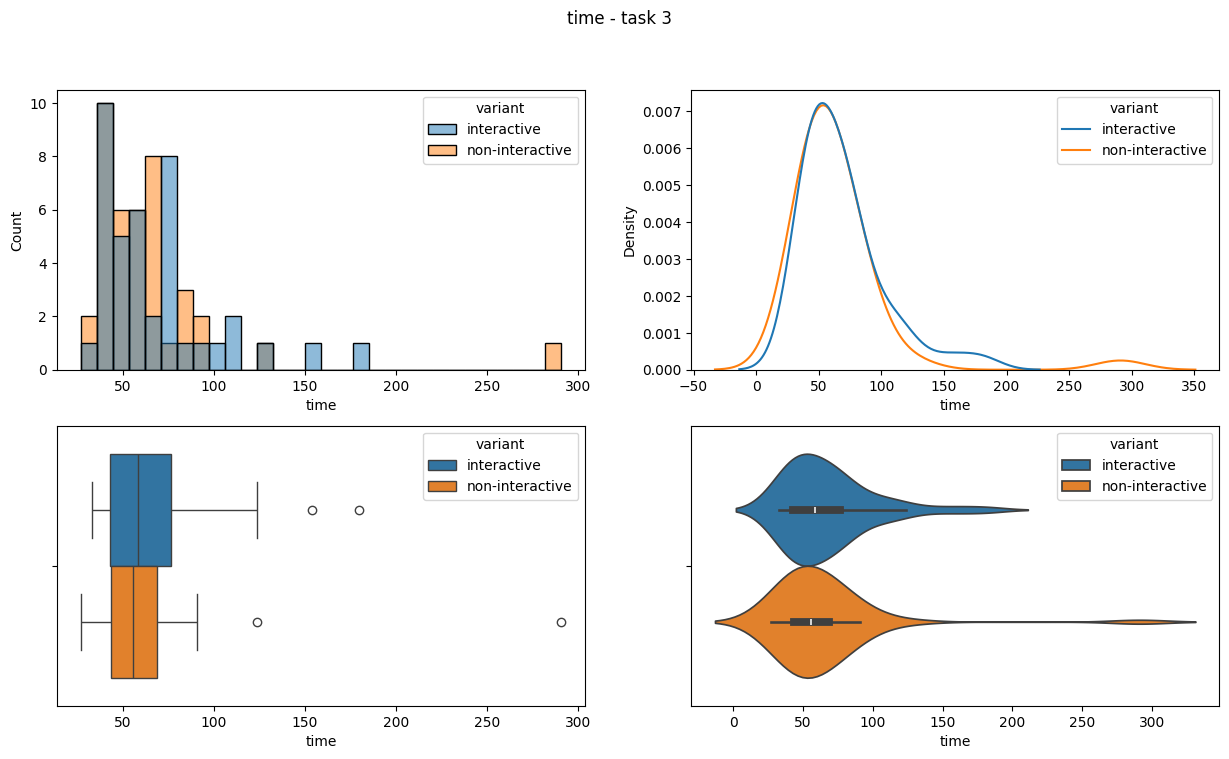

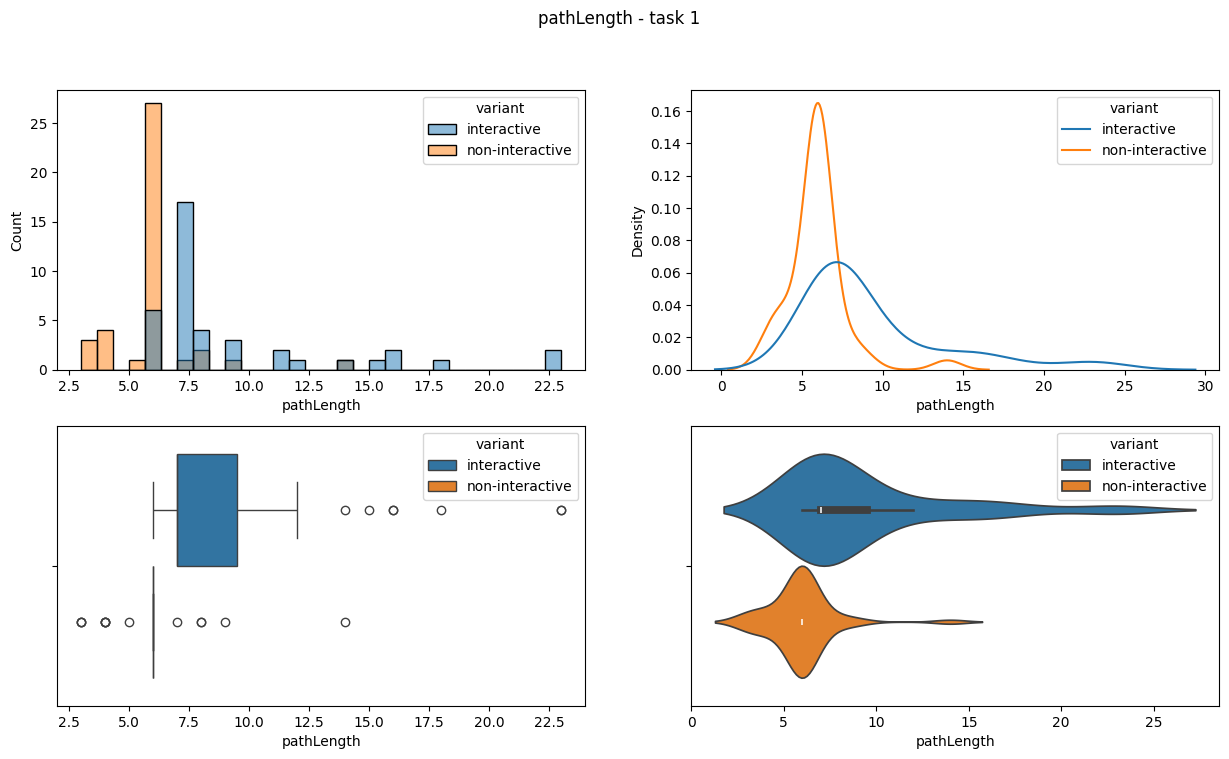

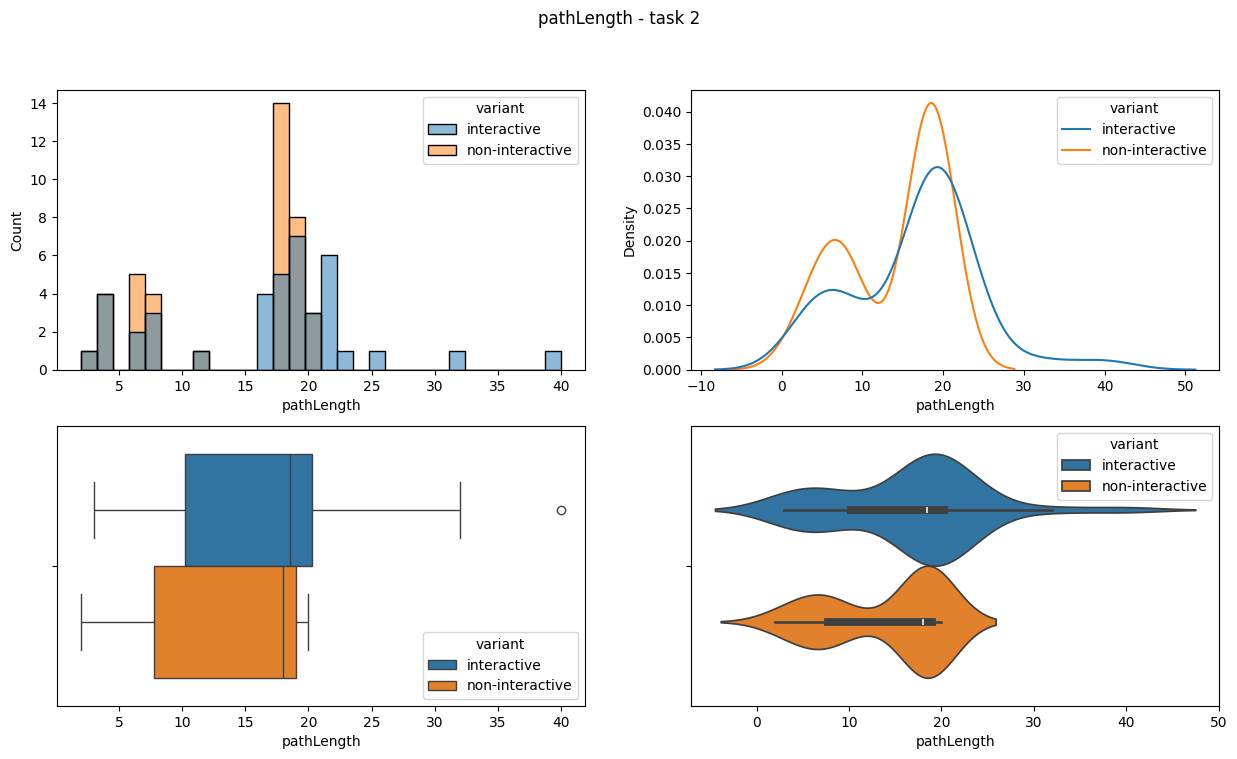

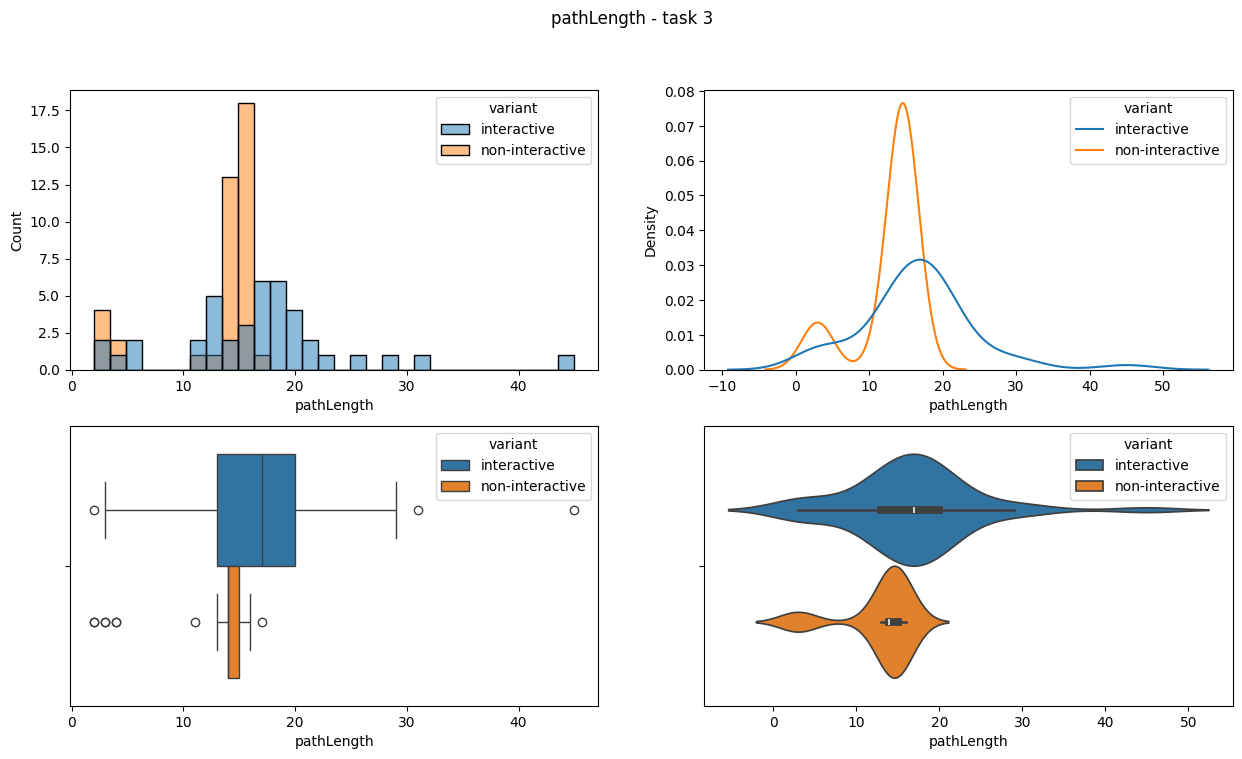

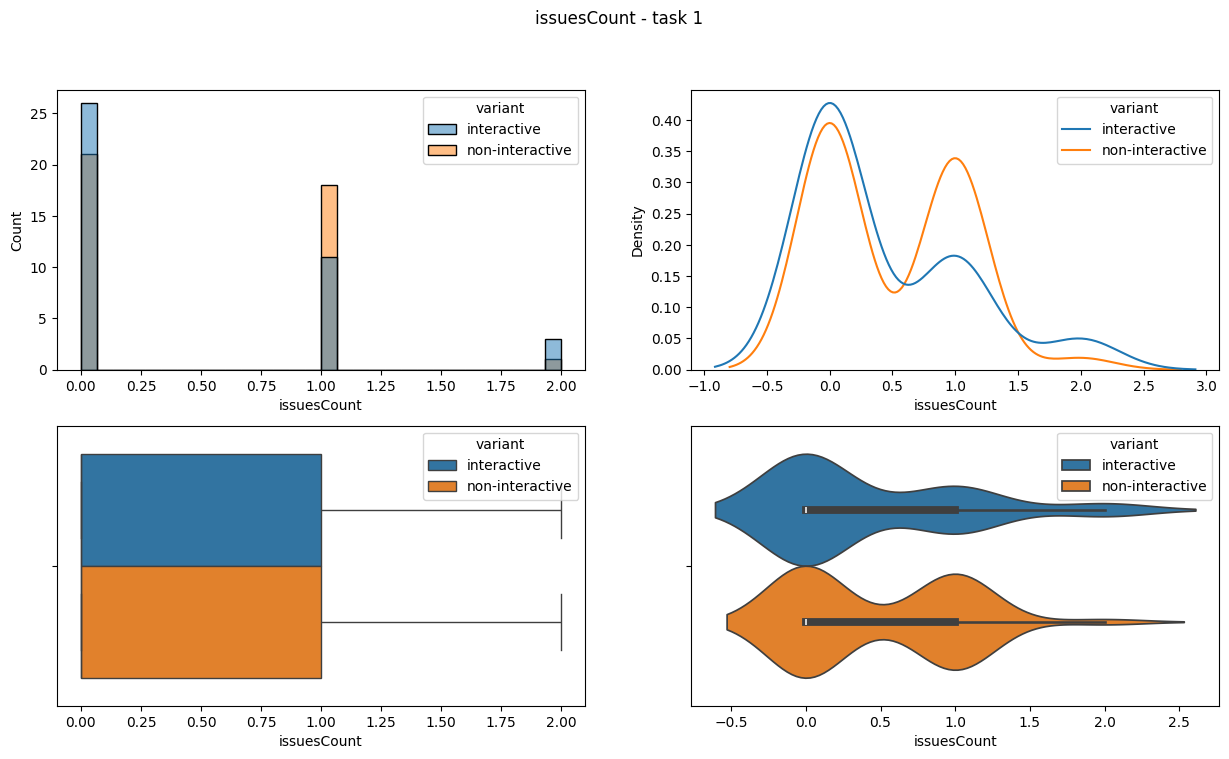

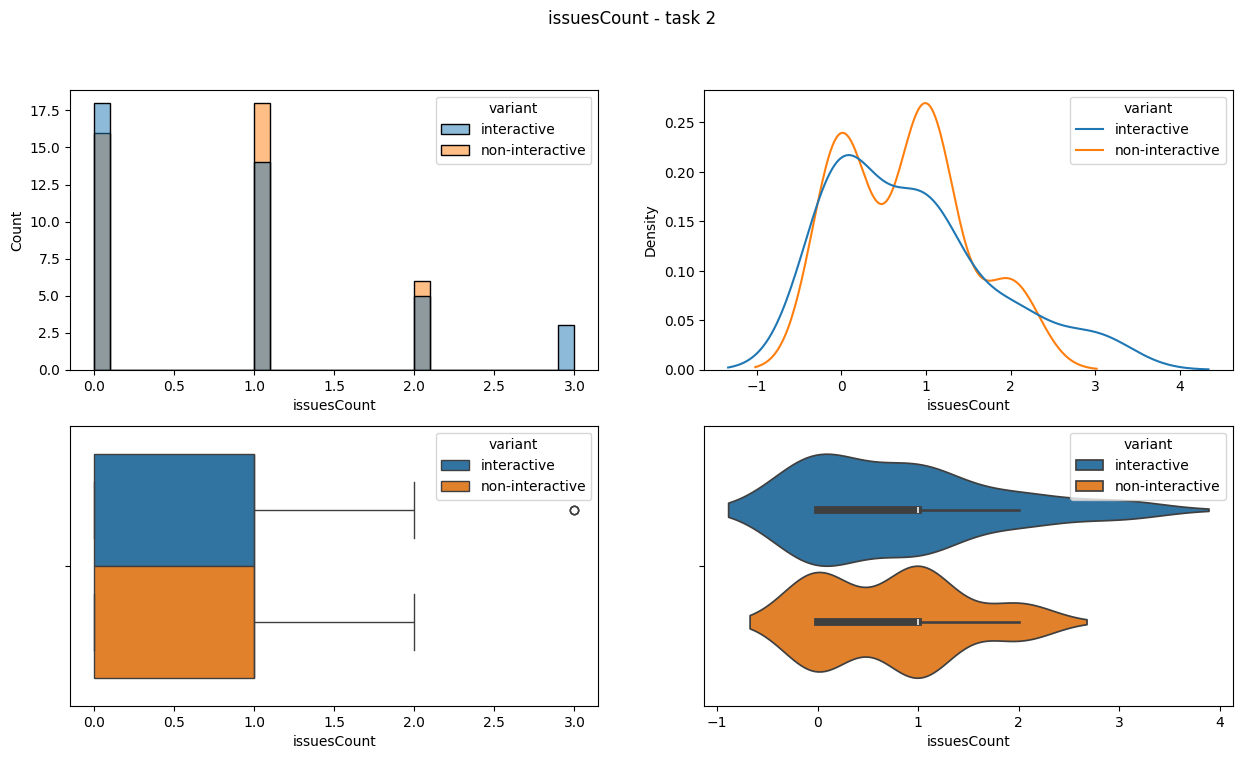

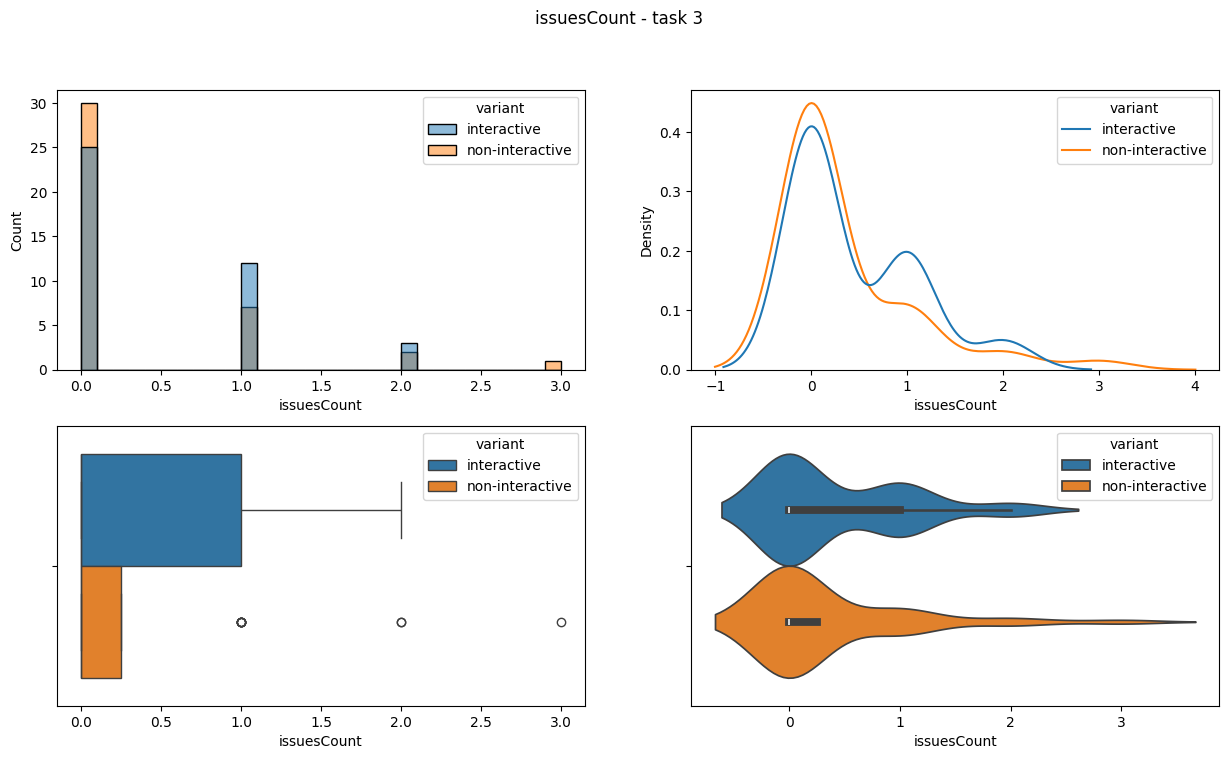

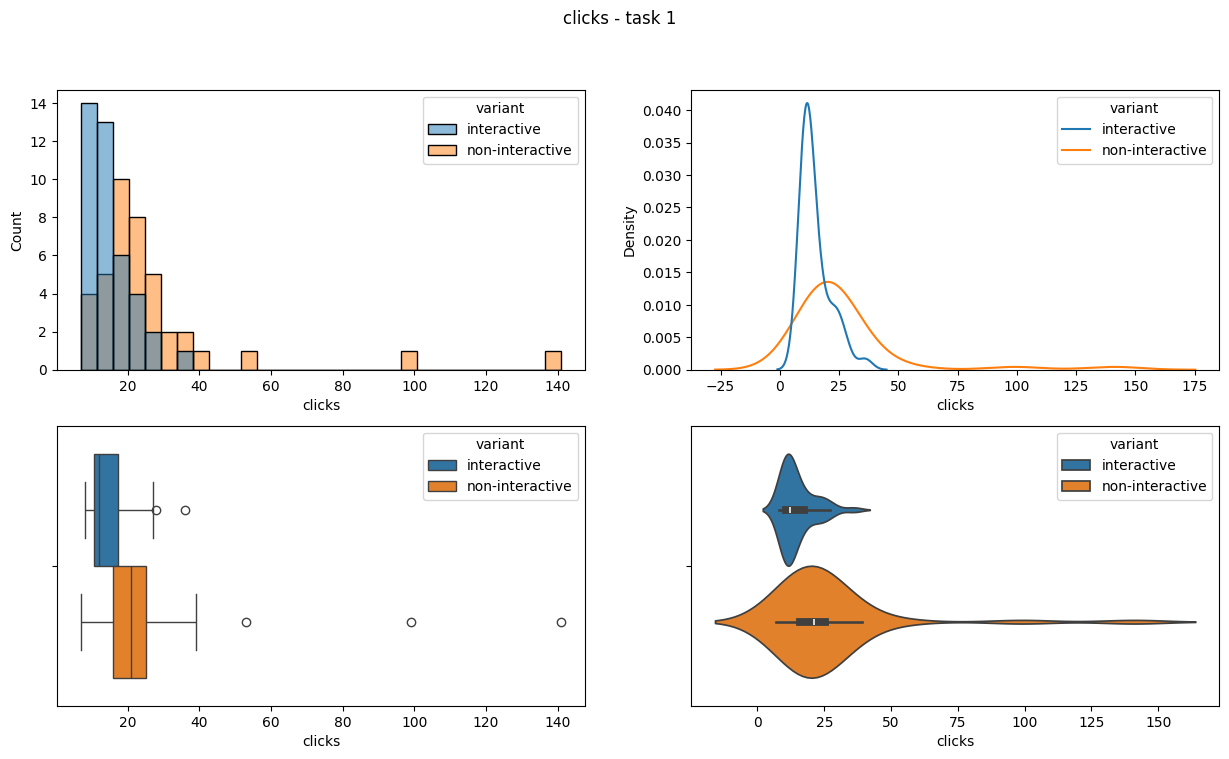

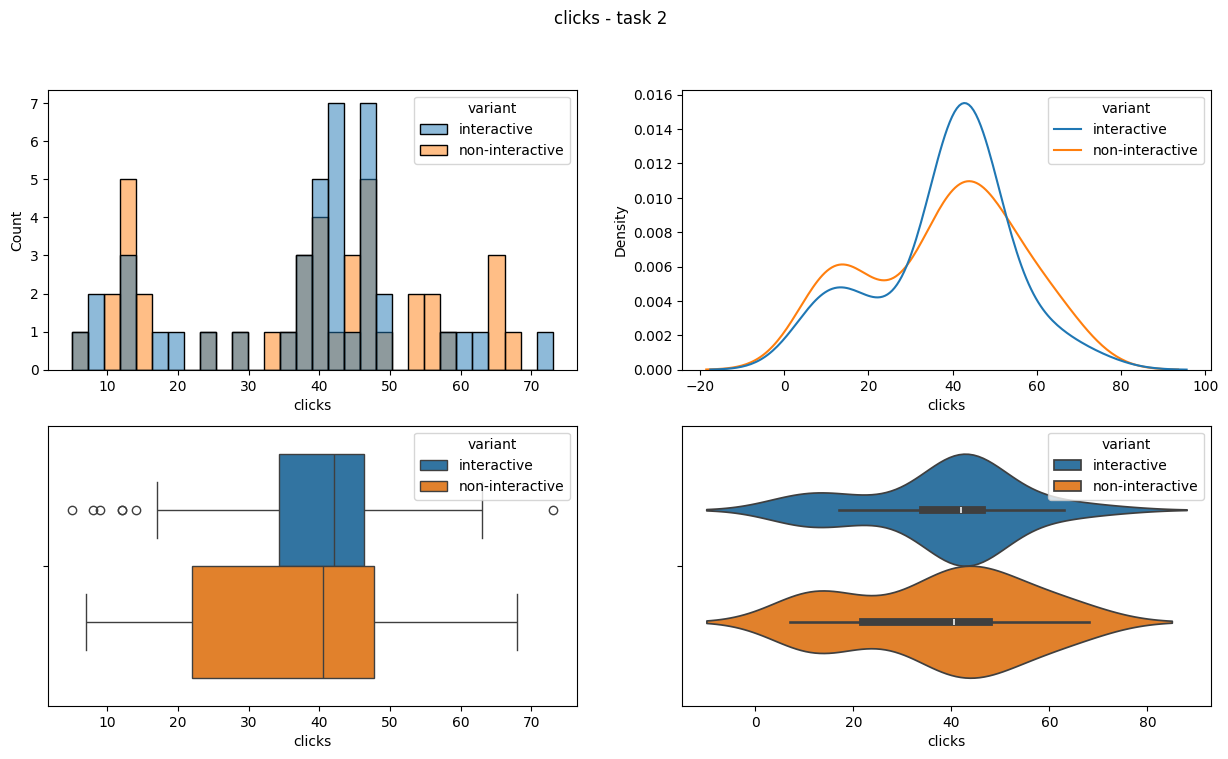

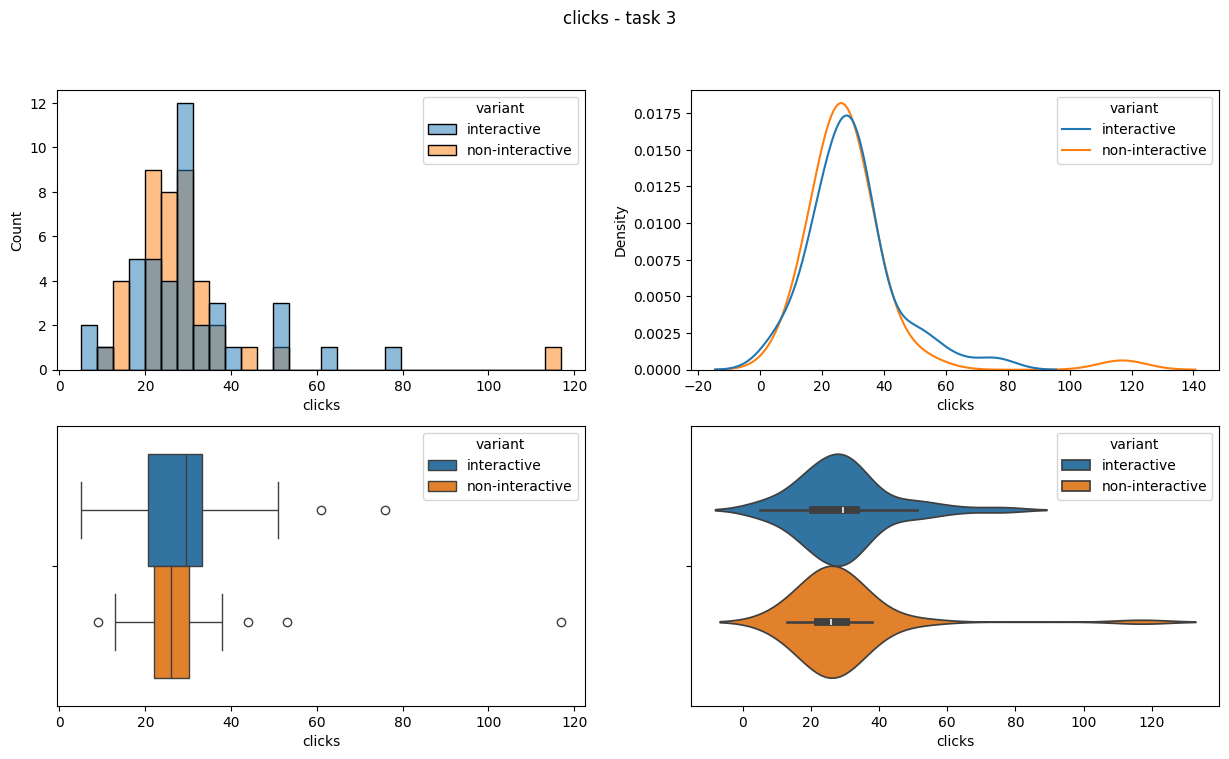

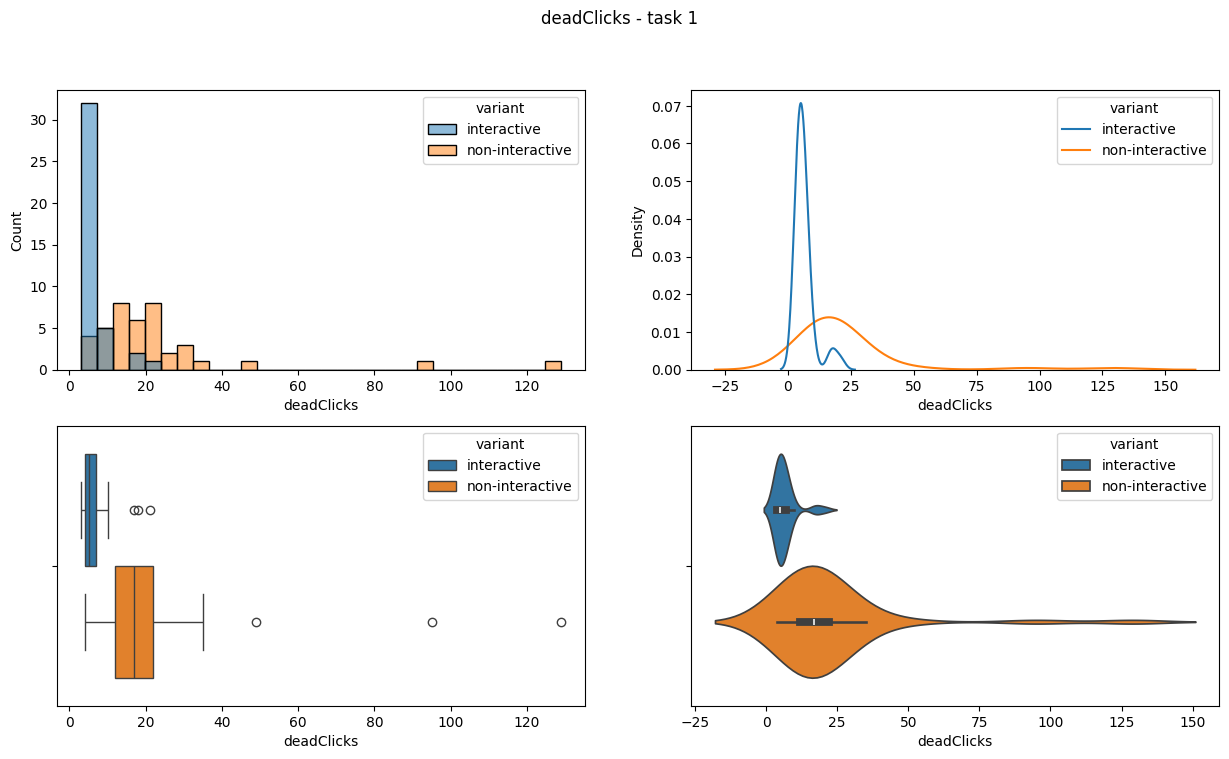

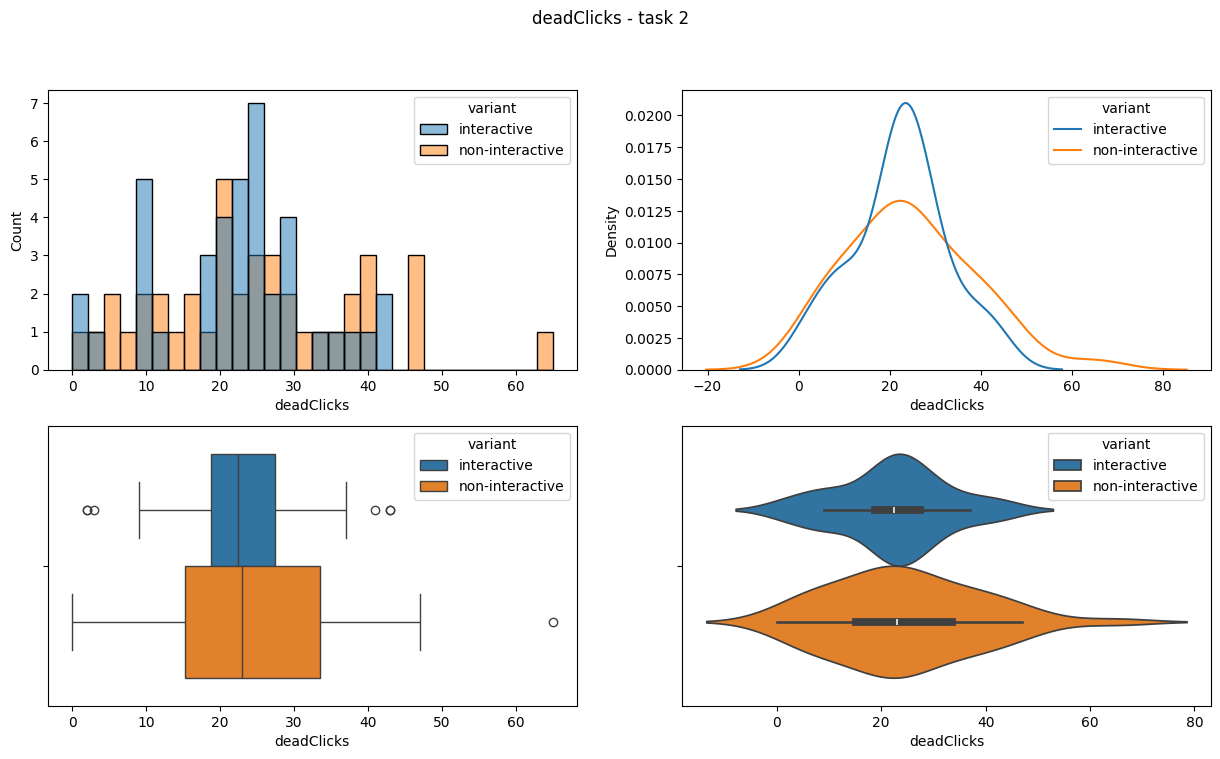

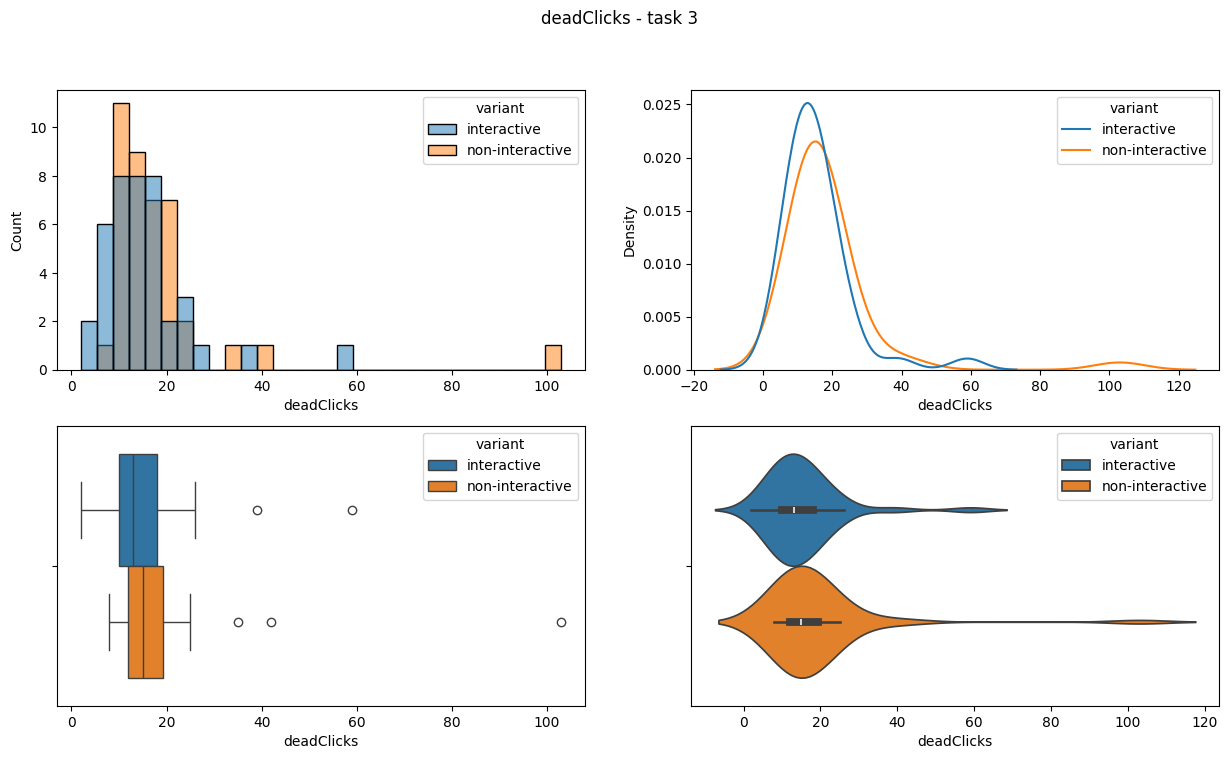

In [18]:
for column in numeric:
    for task in [1, 2, 3]:
        fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))
        sns.histplot(data=results[results.task==task], x=column, bins=30, hue='variant', ax=ax1)
        sns.kdeplot(data=results[results.task==task], x=column, hue='variant',  ax=ax2)
        sns.boxplot(data=results[results.task==task], x=column, hue='variant', ax=ax3)
        sns.violinplot(data=results[results.task==task], x=column, hue='variant', ax=ax4)
        fig.suptitle(column + ' - task ' + str(task))

## Ease of use and lostness

In [19]:
results[scales].agg(['mean', 'median', 'std', 'min', 'max', 'sum']).transpose()

,mean,median,std,min,max,sum
ease,4.470833,5.0,1.836173,1.0,7.0,1073.0
lostness,3.654167,3.0,1.809200,1.0,7.0,877.0


In [20]:
results[scales].agg(['mean', 'median', 'std', 'min', 'max', 'sum']).quantile([0.1, 0.25, 0.5, 0.75, 0.95])

,ease,lostness
0.10,1.418086,1.404600
0.25,2.494838,2.106900
0.50,4.735417,3.327083
0.75,6.500000,6.163542
0.95,806.500000,659.500000


In [21]:
results[scales + ["variant"]].groupby('variant').agg(['mean', 'median', 'std', 'min', 'max', 'sum'])

ease                                lostness         \
                     mean median       std min max  sum      mean median   
variant                                                                    
interactive      4.591667    5.0  1.756122   1   7  551  3.416667    3.0   
non-interactive  4.350000    5.0  1.912585   1   7  522  3.891667    4.0   

                                        
                      std min max  sum  
variant                                 
interactive      1.727598   1   7  410  
non-interactive  1.864285   1   7  467

In [22]:
results[scales + ["variant"]].groupby('variant').quantile([0.1, 0.25, 0.5, 0.75, 0.95])

ease  lostness
variant                             
interactive     0.10   2.0      1.90
                0.25   3.0      2.00
                0.50   5.0      3.00
                0.75   6.0      5.00
                0.95   7.0      6.05
non-interactive 0.10   1.0      1.00
                0.25   3.0      2.00
                0.50   5.0      4.00
                0.75   6.0      5.00
                0.95   7.0      7.00

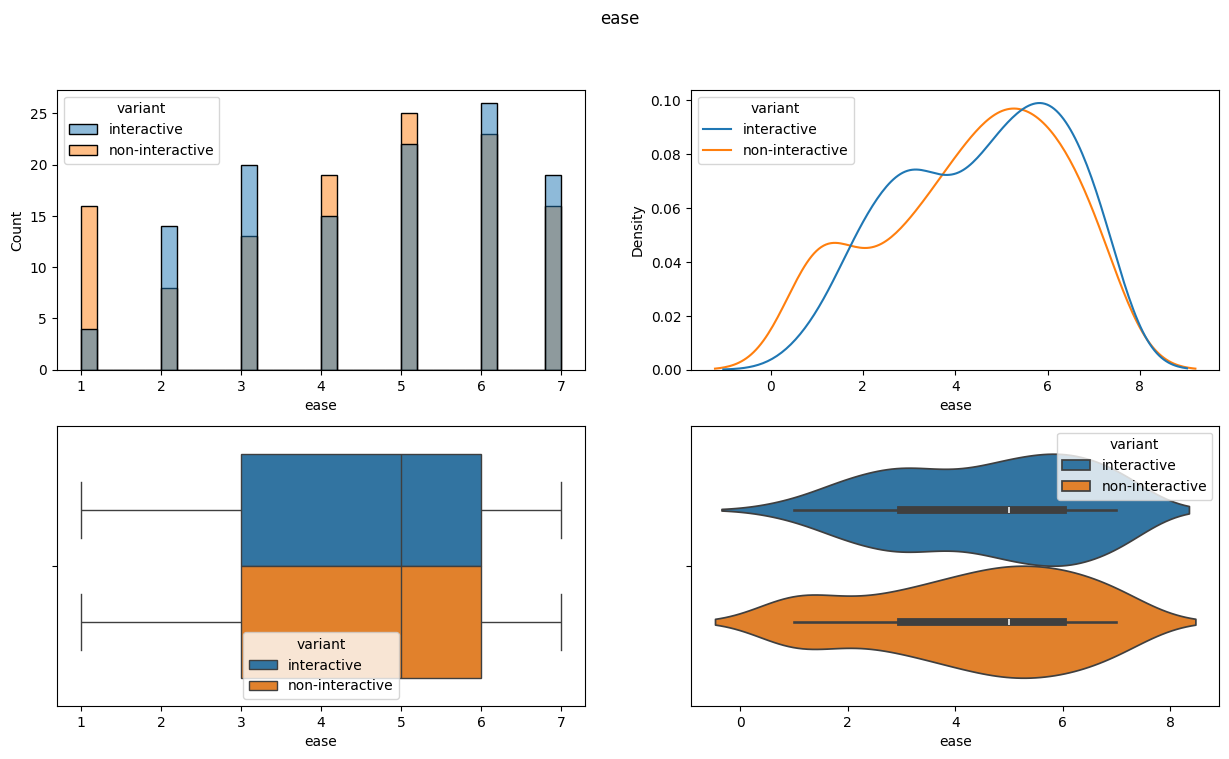

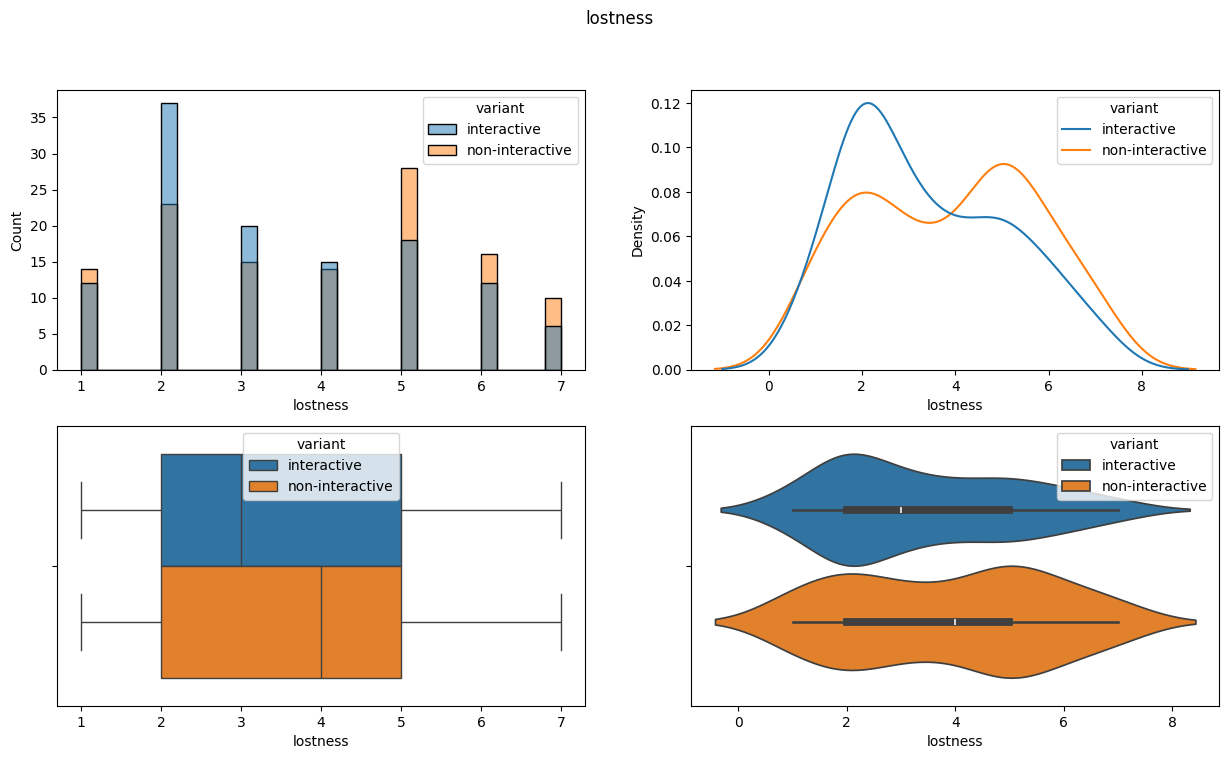

In [23]:
for column in scales:
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))
    sns.histplot(data=results, x=column, bins=30, hue='variant', ax=ax1)
    sns.kdeplot(data=results, x=column, hue='variant',  ax=ax2)
    sns.boxplot(data=results, x=column, hue='variant', ax=ax3)
    sns.violinplot(data=results, x=column, hue='variant', ax=ax4)
    fig.suptitle(column)

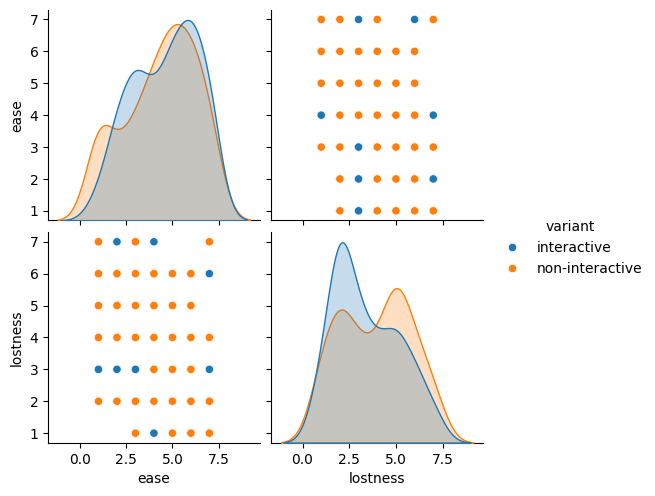

In [24]:
sns.pairplot(data=results[scales + ["variant"]], hue="variant")

### Per task

In [25]:
results[scales + ["variant", "task"]].groupby(['variant', 'task']).agg(['mean', 'median', 'std', 'min', 'max', 'sum'])

ease                               lostness         \
                       mean median       std min max  sum     mean median   
variant         task                                                        
interactive     1     5.425    6.0  1.708013   1   7  217    2.925    2.0   
                2     4.075    4.0  1.491643   2   7  163    3.575    3.5   
                3     4.275    4.0  1.782932   1   7  171    3.750    3.5   
non-interactive 1     4.500    5.0  1.867399   1   7  180    3.725    4.0   
                2     4.025    4.0  1.846514   1   7  161    4.125    4.5   
                3     4.525    5.0  2.025320   1   7  181    3.825    4.0   

                                             
                           std min max  sum  
variant         task                         
interactive     1     1.623347   1   7  117  
                2     1.677720   1   7  143  
                3     1.808101   1   7  150  
non-interactive 1     1.811466   1   7  149  
                2     1.814295   1   7  165  
                3     1.985686   1   7  153

In [26]:
results[scales + ["variant", "task"]].groupby(['variant', 'task']).quantile([0.1, 0.25, 0.5, 0.75, 0.95])

ease  lostness
variant         task                     
interactive     1    0.10  2.90       1.0
                     0.25  5.00       2.0
                     0.50  6.00       2.0
                     0.75  7.00       4.0
                     0.95  7.00       6.0
                2    0.10  2.00       1.9
                     0.25  3.00       2.0
                     0.50  4.00       3.5
                     0.75  5.00       5.0
                     0.95  6.05       6.0
                3    0.10  2.00       2.0
                     0.25  3.00       2.0
                     0.50  4.00       3.5
                     0.75  6.00       5.0
                     0.95  7.00       7.0
non-interactive 1    0.10  1.00       1.9
                     0.25  3.00       2.0
                     0.50  5.00       4.0
                     0.75  6.00       5.0
                     0.95  7.00       7.0
                2    0.10  1.00       1.9
                     0.25  3.00       3.0
                     0.50  4.00       4.5
                     0.75  5.25       5.0
                     0.95  7.00       7.0
                3    0.10  1.00       1.0
                     0.25  3.00       2.0
                     0.50  5.00       4.0
                     0.75  6.00       6.0
                     0.95  7.00       7.0

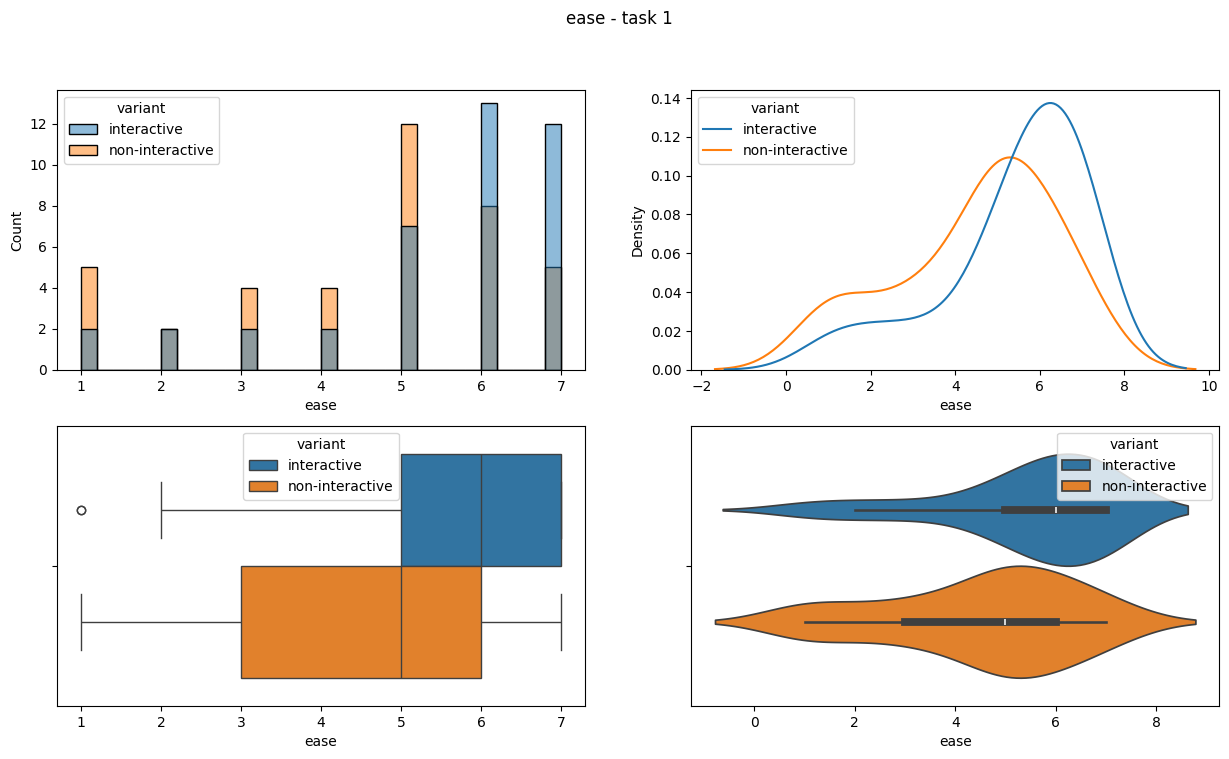

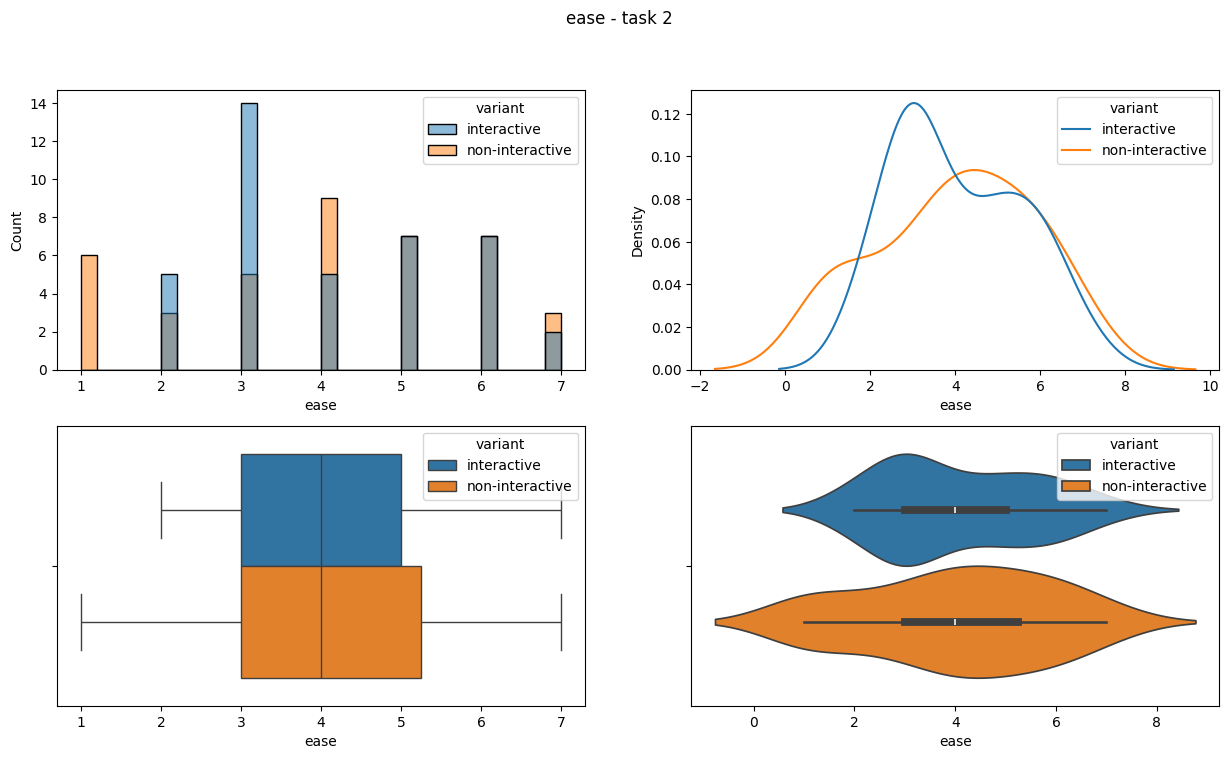

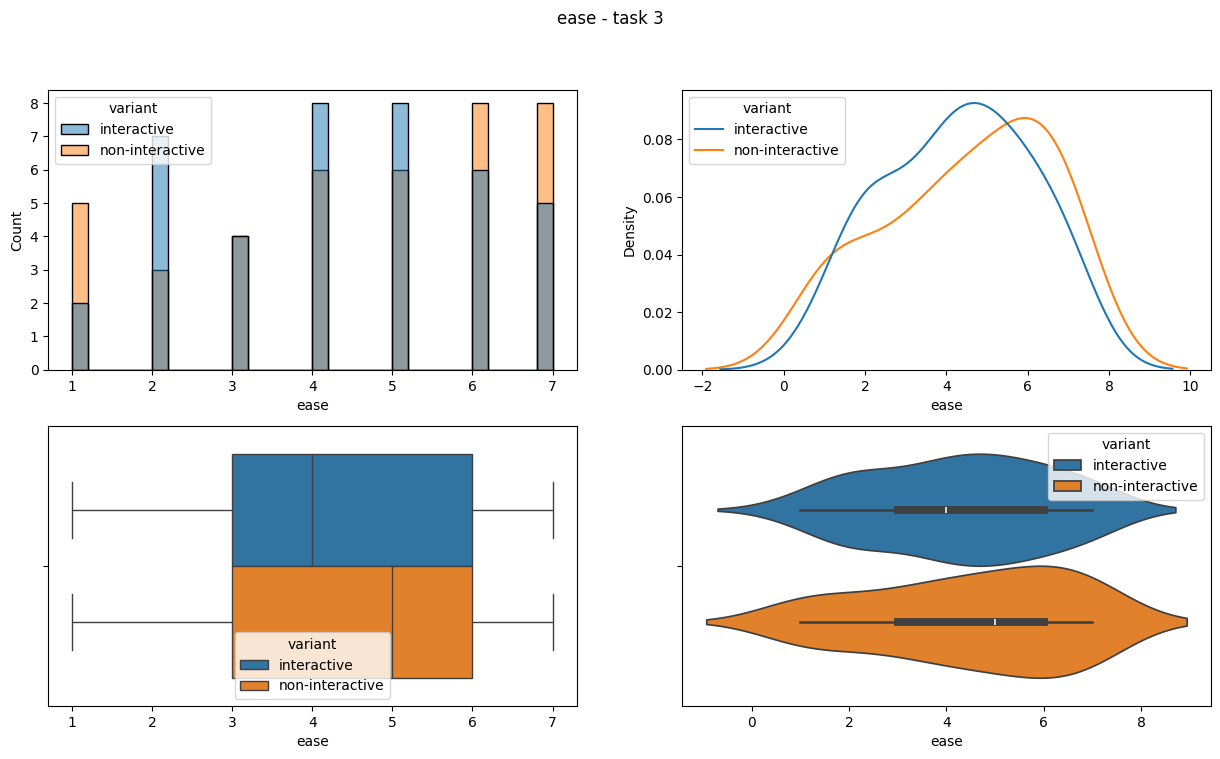

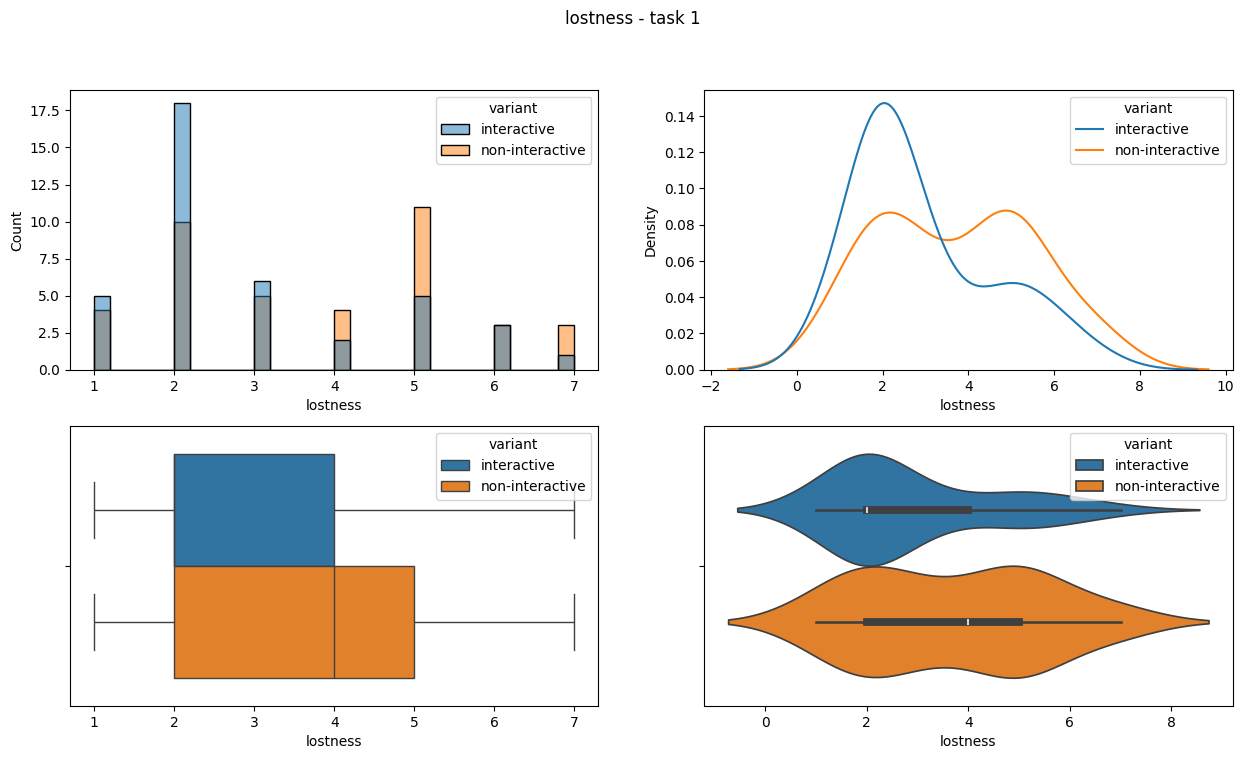

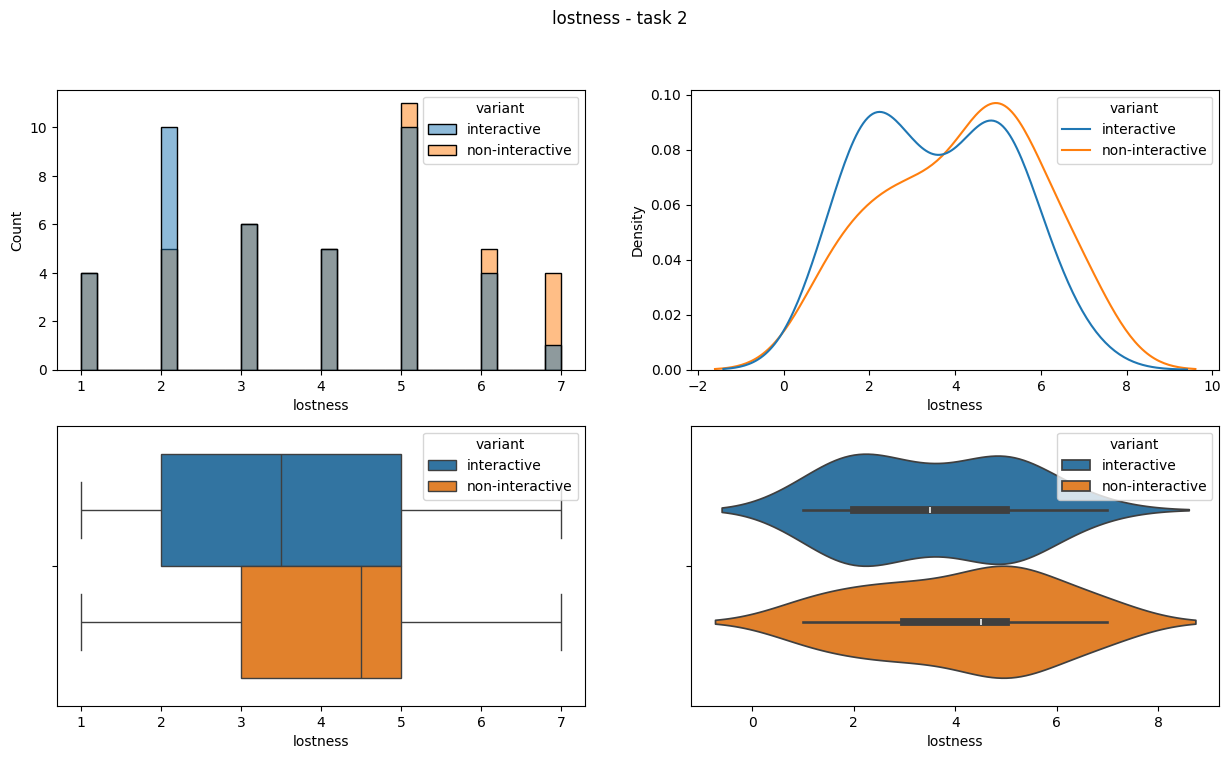

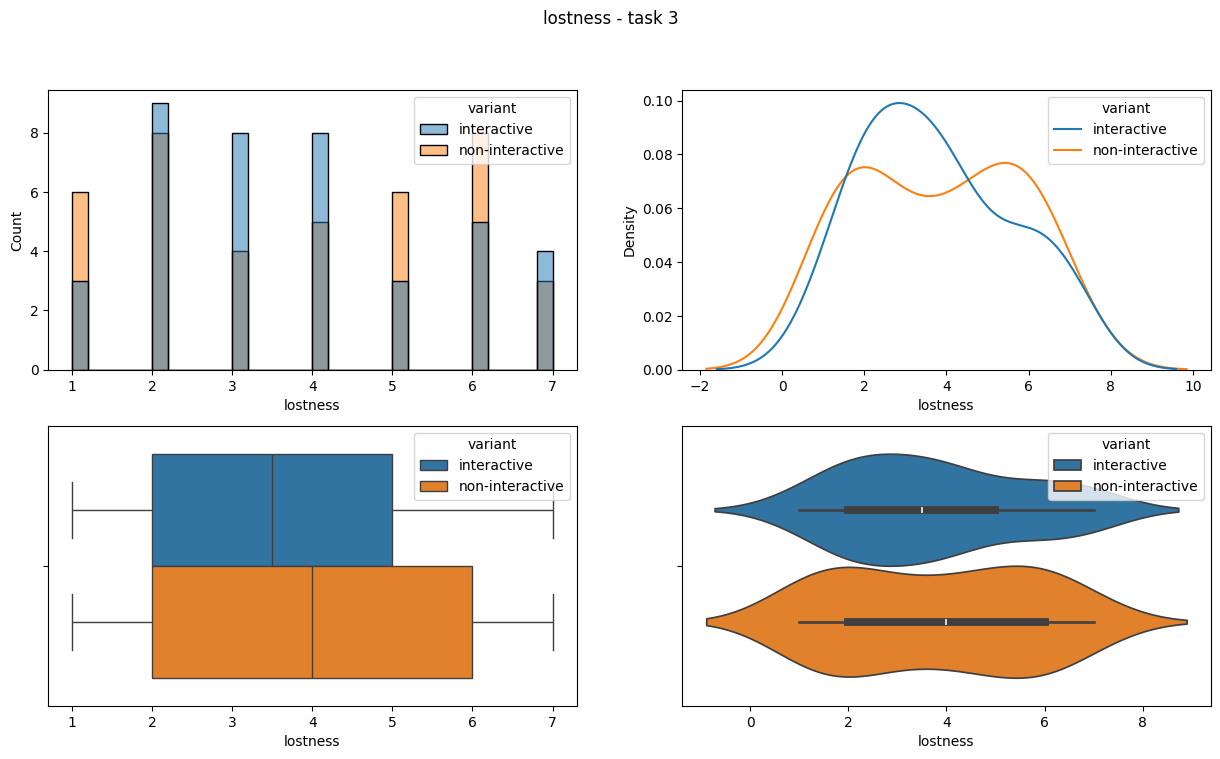

In [27]:
for column in scales:
    for task in [1, 2, 3]:
        fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))
        sns.histplot(data=results[results.task==task], x=column, bins=30, hue='variant', ax=ax1)
        sns.kdeplot(data=results[results.task==task], x=column, hue='variant',  ax=ax2)
        sns.boxplot(data=results[results.task==task], x=column, hue='variant', ax=ax3)
        sns.violinplot(data=results[results.task==task], x=column, hue='variant', ax=ax4)
        fig.suptitle(column + ' - task ' + str(task))

## Success, issues

In [28]:
results[categorical].agg(['mean', 'sum'])

,success,issuesReported
mean,0.779167,0.433333
sum,187.000000,104.000000


In [29]:
results[categorical + ["variant"]].groupby('variant').agg(['mean', 'sum'])

success     issuesReported    
                     mean sum           mean sum
variant                                         
interactive      0.808333  97       0.425000  51
non-interactive  0.750000  90       0.441667  53

In [30]:
for col in categorical:
    print(results[[col, "variant"]].groupby('variant').value_counts(), end='\n\n')

variant          success
interactive      True       97
                 False      23
non-interactive  True       90
                 False      30
Name: count, dtype: int64

variant          issuesReported
interactive      False             69
                 True              51
non-interactive  False             67
                 True              53
Name: count, dtype: int64



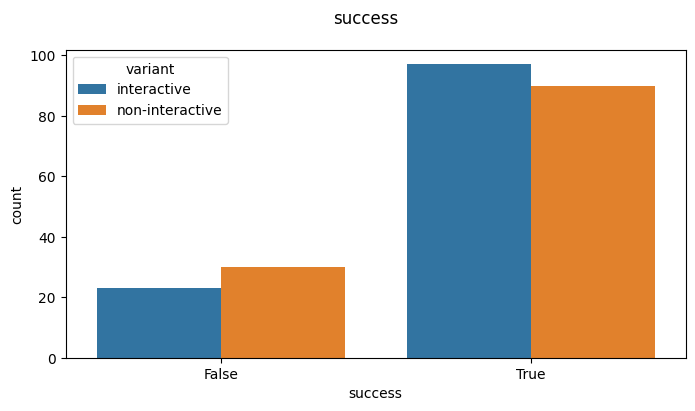

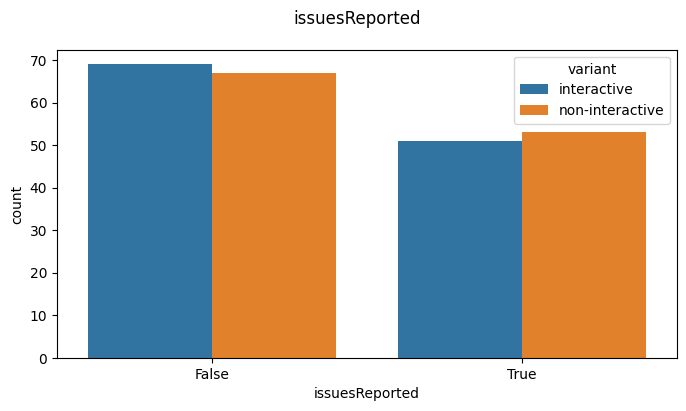

In [31]:
for column in categorical:
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.countplot(data=results, x=column, hue='variant', ax=ax)
    fig.suptitle(column)

### Per task

In [32]:
results[categorical + ["variant", "task"]].groupby(['variant', 'task']).agg(['mean', 'sum'])

success     issuesReported    
                        mean sum           mean sum
variant         task                               
interactive     1      0.900  36          0.350  14
                2      0.700  28          0.550  22
                3      0.825  33          0.375  15
non-interactive 1      0.800  32          0.475  19
                2      0.625  25          0.600  24
                3      0.825  33          0.250  10

In [33]:
for col in categorical:
    print(results[[col, "variant", "task"]].groupby(['variant', 'task']).value_counts(), end='\n\n')

variant          task  success
interactive      1     True       36
                       False       4
                 2     True       28
                       False      12
                 3     True       33
                       False       7
non-interactive  1     True       32
                       False       8
                 2     True       25
                       False      15
                 3     True       33
                       False       7
Name: count, dtype: int64

variant          task  issuesReported
interactive      1     False             26
                       True              14
                 2     True              22
                       False             18
                 3     False             25
                       True              15
non-interactive  1     False             21
                       True              19
                 2     True              24
                       False             16
                 3  

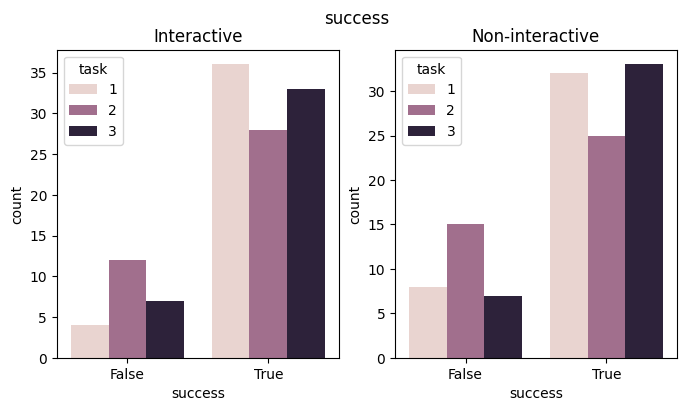

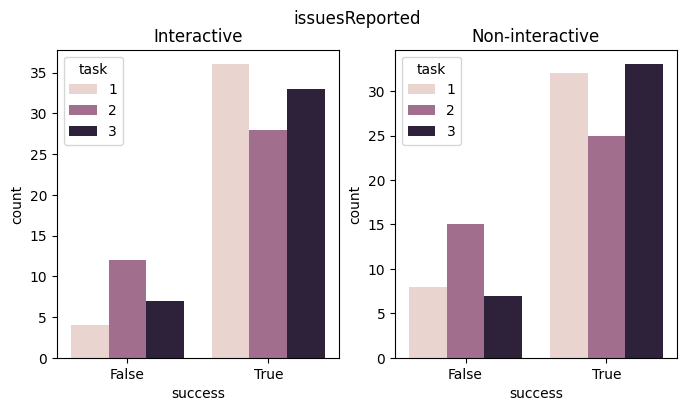

In [34]:
for column in categorical:
    fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(8, 4))
    sns.countplot(data=results[results.variant=='interactive'], x='success', hue='task', ax=ax1).set_title('Interactive')
    sns.countplot(data=results[results.variant=='non-interactive'], x='success', hue='task', ax=ax2).set_title('Non-interactive')
    fig.suptitle(column)

## Funnels

In [35]:
# remove component interactions
funnels = funnels[funnels.screen != funnels.nextScreen]

In [36]:
# funnels from -> to
HTML(funnels.sort_values(
    by=["task", "screen", "sum", "diff"], 
    ascending=[True, True, False, False])[["task", "screen", "nextScreen", "interactive", "nonInteractive"]].to_html())

,task,screen,nextScreen,interactive,nonInteractive
12,1,ACCESSORIES,SHOES,1,0
11,1,ACCESSORIES,TSHIRTS,1,0
37,1,HOME,TSHIRTS,36,42
38,1,HOME,TSHIRT-PLACEHOLDER,7,0
39,1,HOME,SEARCH-POPUP,3,0
40,1,HOME,SALES,1,0
24,1,HOODIES,SHOES,1,0
36,1,NEW,HOODIES,1,0
35,1,NEW,TSHIRT-PLACEHOLDER,1,0
29,1,SALES,TSHIRT-PLACEHOLDER,3,0


In [37]:
# funnels to <- from
HTML(funnels.sort_values(
    by=["task", "nextScreen", "sum", "diff"], 
    ascending=[True, True, False, False])[["task", "nextScreen", "screen", "interactive", "nonInteractive"]].to_html())

,task,nextScreen,screen,interactive,nonInteractive
25,1,ACCESSORIES,SHOES,1,0
1,1,ACCESSORIES,TSHIRTS,1,0
17,1,HOME,TSHIRT-PLACEHOLDER,6,0
7,1,HOME,TSHIRTS,0,2
23,1,HOME,SEARCH-POPUP,1,0
36,1,HOODIES,NEW,1,0
34,1,NEW,SEARCH,1,0
6,1,NEW,TSHIRTS,1,0
15,1,SALES,TSHIRT-PLACEHOLDER,3,0
5,1,SALES,TSHIRTS,2,0


In [38]:
# funnels with the most differences between variants
funnels[[
    "task", "screen", "interactive", "nonInteractive", "diff", "sum"
]].groupby(["task", "screen"]).sum().reset_index().sort_values("diff", ascending=False)

,task,screen,interactive,nonInteractive,diff,sum
39,3,PROFILE/OVERVIEW,66,34,78,100
13,2,CART,91,51,68,142
28,2,WISHLIST,71,35,58,106
40,3,PROFILE/PURCHASES,82,33,53,115
14,2,HOME,74,65,49,139
10,1,TSHIRT-PLACEHOLDER,43,0,43,43
42,3,PROFILE/RETURS,94,100,40,194
11,1,TSHIRTS,63,43,34,106
48,3,TSHIRT,33,0,33,33
31,3,HOME,74,72,32,146


## Notes

In [39]:
for index, row in results.iterrows():
    note = row.note
    if (not pd.isnull(note) and note not in [
        'NA ', 'no issues ', 'No issues'
    ]):
        print(('I ' if row.variant=='interactive' else 'N ') + 'T' + str(row.task) + ': ' + note)

I T2: it doesn't say when the added to basket, also having to create an account deletes the basket and Wishlist, and having to create an account to purchase an item.
I T1: No tooltips were available on hover. As someone who is colourblind this made choosing a colour slightly more difficult.
I T2: I had to create an account which meant I lost the item in my wishlist
I T2: It did nothing after I pressed buy.
I T3: I just didn't know where to press. It was confusing since it didn't work
I T2: it will not let me make the purchase 
I T1: no issues but i would love to be able to sort from low to high and vice versa
I T2: no success message or indication things had been added to my cart! a little confusing
I T3: I wish i could start returns from the order page to prevent the back and forth
I T1: It was slow to load
I T3: Couldn't click on the returns button so was unsure were else to go. 
I T1: Wishlist wasn't very clear 
I T2: it asked me to create a log in - but not sure if this was part of

## Click count

In [40]:
interactions.groupby(['variant']).size()

variant
interactive        3292
non-interactive    3726
dtype: int64

In [41]:
# all clicks on selected screens
interactions[
    ((interactions.screen.isin(['HOME', 'HOME/T1', 'HOME/T2', 'HOME/T3', 'HOME/T3-2'])) & (interactions.task.isin([1, 2, 3]))) | 
    ((interactions.screen.isin(['CART', 'CART/2', 'CART/3'])) & (interactions.task.isin([2]))) | 
    ((interactions.screen.isin(['PROFILE/PURCHASES', 'PROFILE/PURCHASES-2'])) & (interactions.task.isin([3]))) | 
    ((interactions.screen.isin(['PROFILE/RETURS', 'PROFILE/RETURS-2', 'PROFILE/RETURS-3'])) & (interactions.task.isin([3]))) | 
    ((interactions.screen.isin(['TSHIRT', 'TSHIRT/T1', 'TSHIRT/T1-2', 'TSHIRT/T2-1', 'TSHIRT/T2-2'])) & (interactions.task.isin([1, 2]))) | 
    ((interactions.screen == 'TSHIRTS') & (interactions.task.isin([1, 2]))) | 
    ((interactions.screen.isin(['WISHLIST', 'WISHLIST/2'])) & (interactions.task.isin([2])))
][['variant']].groupby('variant').size()

variant
interactive        1718
non-interactive    2439
dtype: int64

In [42]:
interactions[
    ((interactions.screen.isin(['HOME', 'HOME/T1', 'HOME/T2', 'HOME/T3', 'HOME/T3-2'])) & (interactions.task.isin([1]))) |
    ((interactions.screen.isin(['TSHIRT', 'TSHIRT/T1', 'TSHIRT/T1-2', 'TSHIRT/T2-1', 'TSHIRT/T2-2'])) & (interactions.task.isin([1]))) | 
    ((interactions.screen == 'TSHIRTS') & (interactions.task.isin([1])))
][['variant']].groupby('variant').size()

variant
interactive        405
non-interactive    968
dtype: int64

In [43]:
interactions[
    ((interactions.screen.isin(['HOME', 'HOME/T1', 'HOME/T2', 'HOME/T3', 'HOME/T3-2'])) & (interactions.task.isin([2]))) | 
    ((interactions.screen.isin(['CART', 'CART/2', 'CART/3'])) & (interactions.task.isin([2]))) | 
    ((interactions.screen.isin(['TSHIRT', 'TSHIRT/T1', 'TSHIRT/T1-2', 'TSHIRT/T2-1', 'TSHIRT/T2-2'])) & (interactions.task.isin([2]))) | 
    ((interactions.screen == 'TSHIRTS') & (interactions.task.isin([2]))) | 
    ((interactions.screen.isin(['WISHLIST', 'WISHLIST/2'])) & (interactions.task.isin([2])))
][['variant']].groupby('variant').size()

variant
interactive        879
non-interactive    957
dtype: int64

In [44]:
interactions[
    ((interactions.screen.isin(['HOME', 'HOME/T1', 'HOME/T2', 'HOME/T3', 'HOME/T3-2'])) & (interactions.task.isin([3]))) |
    ((interactions.screen.isin(['PROFILE/PURCHASES', 'PROFILE/PURCHASES-2'])) & (interactions.task.isin([3]))) | 
    ((interactions.screen.isin(['PROFILE/RETURS', 'PROFILE/RETURS-2', 'PROFILE/RETURS-3'])) & (interactions.task.isin([3])))
][['variant']].groupby('variant').size()

variant
interactive        434
non-interactive    514
dtype: int64

In [45]:
interactions[
    ((interactions.screen.isin(['HOME', 'HOME/T1', 'HOME/T2', 'HOME/T3', 'HOME/T3-2'])) & (interactions.task.isin([1, 2, 3]))) | 
    ((interactions.screen.isin(['CART', 'CART/2', 'CART/3'])) & (interactions.task.isin([2]))) | 
    ((interactions.screen.isin(['PROFILE/PURCHASES', 'PROFILE/PURCHASES-2'])) & (interactions.task.isin([3]))) | 
    ((interactions.screen.isin(['PROFILE/RETURS', 'PROFILE/RETURS-2', 'PROFILE/RETURS-3'])) & (interactions.task.isin([3]))) | 
    ((interactions.screen.isin(['TSHIRT', 'TSHIRT/T1', 'TSHIRT/T1-2', 'TSHIRT/T2-1', 'TSHIRT/T2-2'])) & (interactions.task.isin([1, 2]))) | 
    ((interactions.screen == 'TSHIRTS') & (interactions.task.isin([1, 2]))) | 
    ((interactions.screen.isin(['WISHLIST', 'WISHLIST/2'])) & (interactions.task.isin([2])))
][['variant']].groupby('variant').size()

variant
interactive        1718
non-interactive    2439
dtype: int64

In [46]:
# first clicks on selected screens
interactions[
    (
        ((interactions.screen.isin(['HOME', 'HOME/T1', 'HOME/T2', 'HOME/T3', 'HOME/T3-2'])) & (interactions.task.isin([1, 2, 3]))) | 
        ((interactions.screen.isin(['CART', 'CART/2', 'CART/3'])) & (interactions.task.isin([2]))) | 
        ((interactions.screen.isin(['PROFILE/PURCHASES', 'PROFILE/PURCHASES-2'])) & (interactions.task.isin([3]))) | 
        ((interactions.screen.isin(['PROFILE/RETURS', 'PROFILE/RETURS-2', 'PROFILE/RETURS-3'])) & (interactions.task.isin([3]))) | 
        ((interactions.screen.isin(['TSHIRT', 'TSHIRT/T1', 'TSHIRT/T1-2', 'TSHIRT/T2-1', 'TSHIRT/T2-2'])) & (interactions.task.isin([1, 2]))) | 
        ((interactions.screen == 'TSHIRTS') & (interactions.task.isin([1, 2]))) | 
        ((interactions.screen.isin(['WISHLIST', 'WISHLIST/2'])) & (interactions.task.isin([2])))
    ) & (interactions['first'] == 1)
][['variant']].groupby('variant').size()


variant
interactive        401
non-interactive    700
dtype: int64

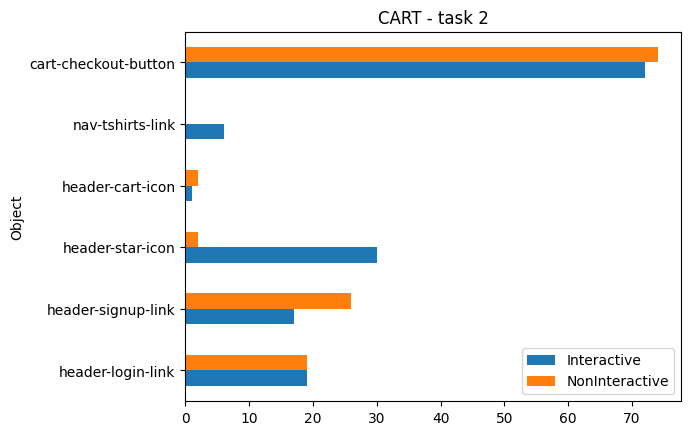

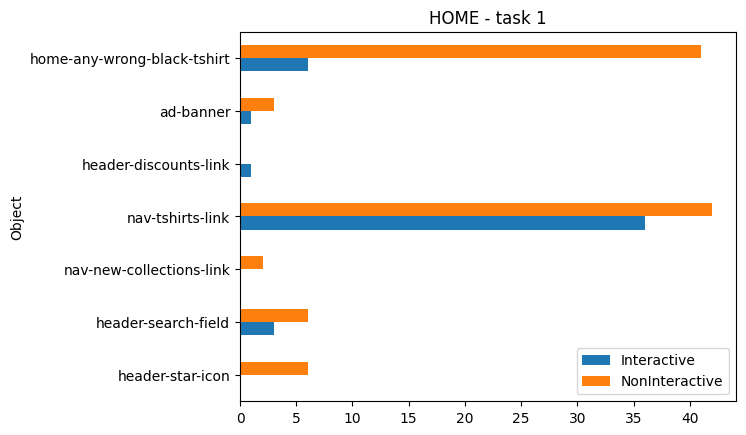

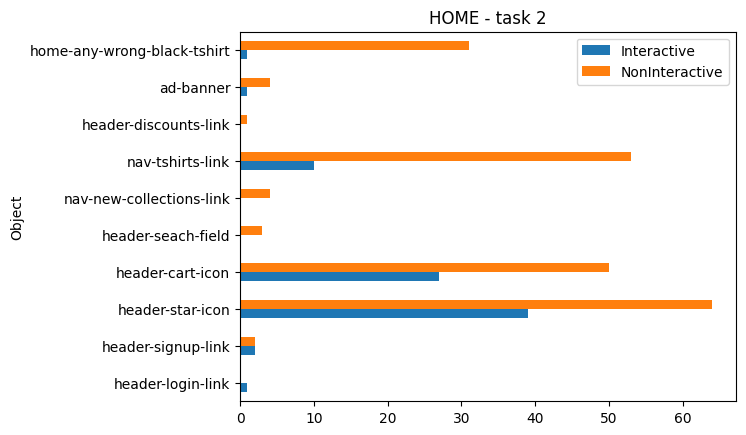

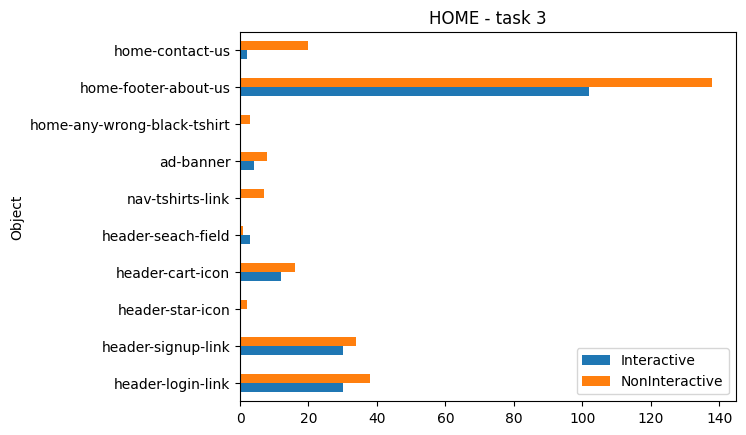

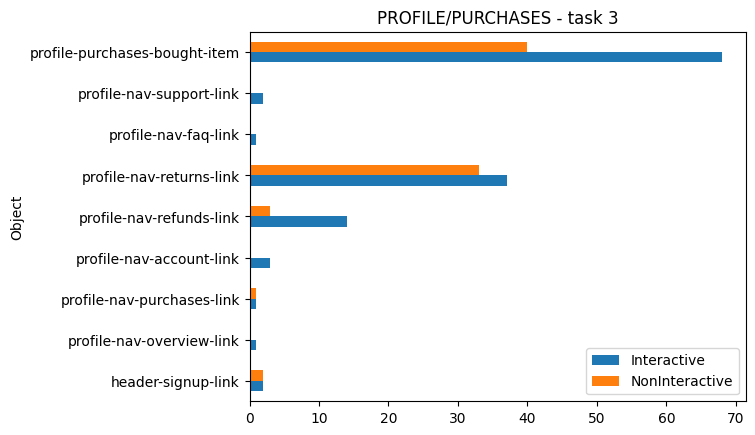

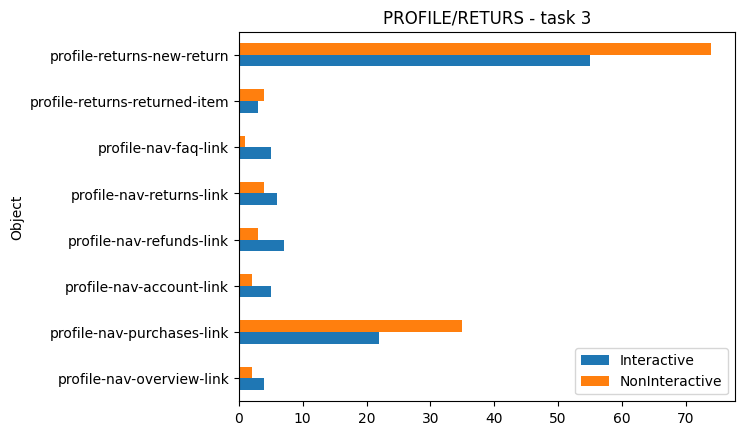

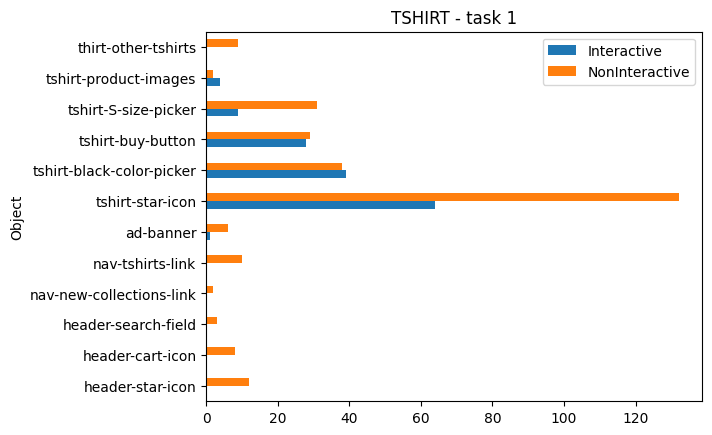

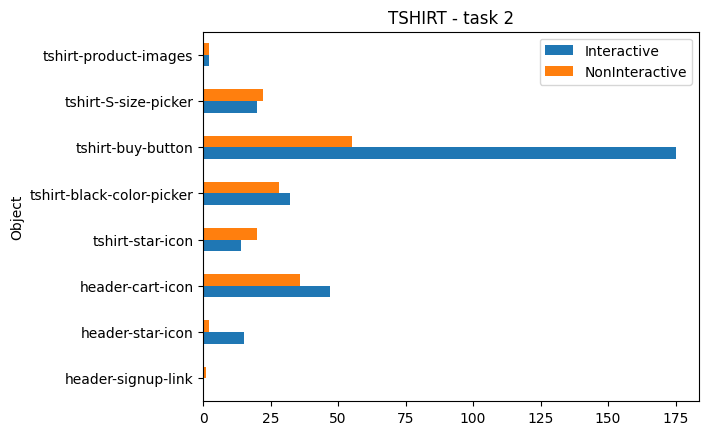

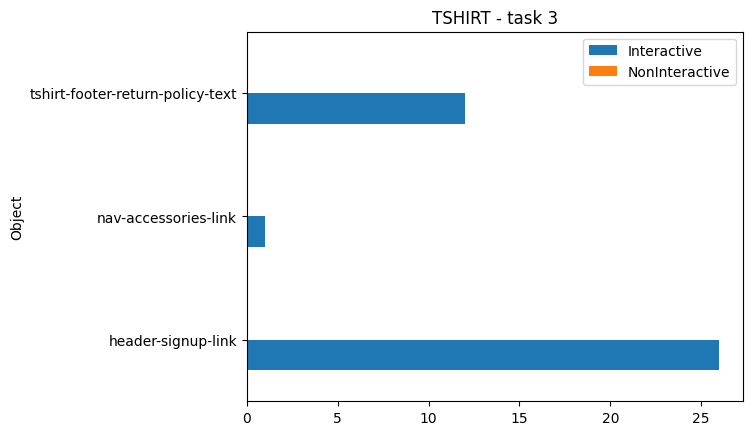

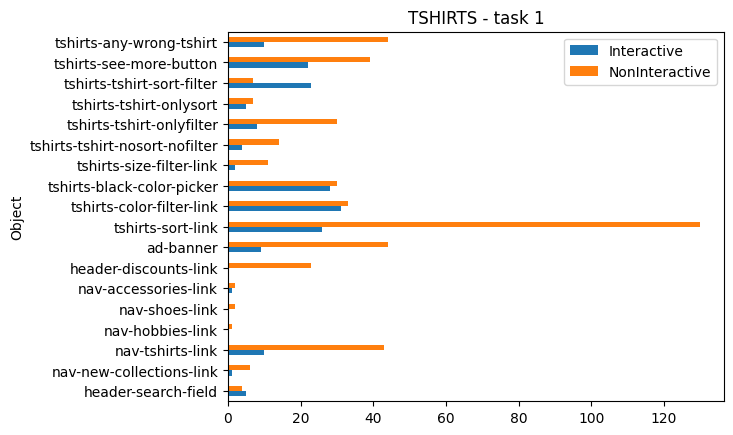

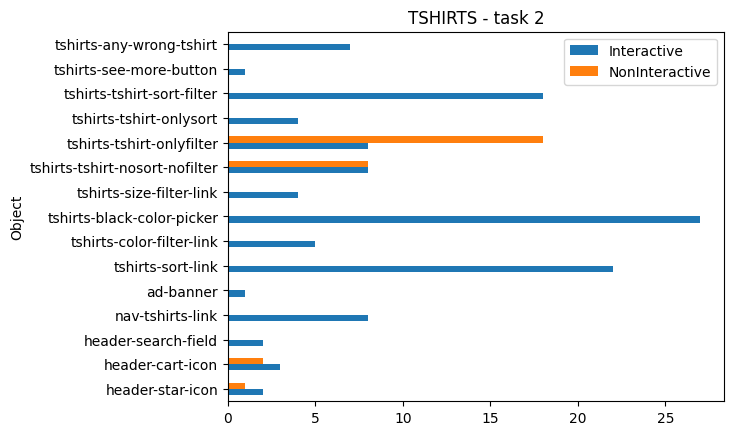

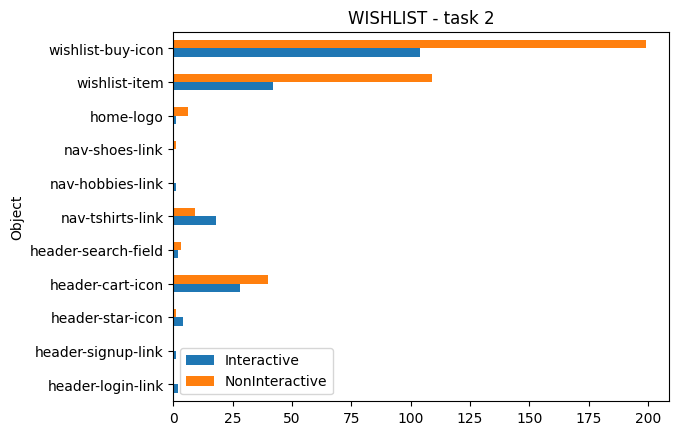

In [47]:
for index, group in clicks.groupby(['Screen','Task']):
    clicks[(clicks.Screen==index[0]) & (clicks.Task==index[1])][['Object', 'Interactive', 'NonInteractive']].plot.barh(x="Object", title=index[0] + ' - task ' + str(index[1]))

## Dead clicks

In [48]:
results[['variant', 'task', 'deadClicks']].groupby(['variant', 'task']).sum()

deadClicks
variant         task            
interactive     1          259.0
                2          891.0
                3          614.0
non-interactive 1          899.0
                2          983.0
                3          749.0